# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

# Utilities (Functions)

## Mapping Function

In [2]:
def apply_all_mappings_with_nan_replacement(df, mappings_df):
    # Identify columns with mappings
    columns_with_mappings = mappings_df[mappings_df['code/format'].notnull()]['field name'].unique()
    
    for column_name in columns_with_mappings:
        if column_name in df.columns:
            # Replace -1 with NaN in the df column
            df[column_name] = df[column_name].replace(-1, np.nan)
            
            # Filter mappings for the specific column
            column_mappings = mappings_df[mappings_df['field name'] == column_name]
            
            # Ensure that 'code/format' is numeric for matching with df column values
            if column_mappings['code/format'].dtype == 'O':
                column_mappings['code/format'] = pd.to_numeric(column_mappings['code/format'], errors='coerce')
            
            # Create a mapping dictionary {code/format: label}, dropping any NaN keys
            mapping_dict = pd.Series(column_mappings['label'].values, index=column_mappings['code/format']).dropna().to_dict()
            
            # Replace values in the column based on the mapping dictionary
            df[column_name] = df[column_name].map(mapping_dict).fillna(df[column_name])

    return df

## Information Function

In [3]:
def show_information(df, column_name : str, sort=True, plot=True):
    unique_value_number = df[f'{column_name}'].nunique()
    # unique_values = df[f'{column_name}'].unique()
    unique_value_counts = df[f'{column_name}'].value_counts()

    if sort:
        filtered_for_plot = df.groupby(f'{column_name}')[f'{column_name}'].size().sort_values(ascending=False)
    else:
        filtered_for_plot = df.groupby(f'{column_name}')[f'{column_name}'].size()


    print(f'''{column_name} has {unique_value_number} Unique Values \n
{unique_value_counts}
    ''')

    if plot:
        x = filtered_for_plot.index
        y = filtered_for_plot
        fig, ax = plt.subplots(figsize=(10, 6))

        ax.bar(x, y, color='#005f73')
        ax.tick_params(length=0)
        ax.tick_params(axis='x', color='#22333b', rotation=90)
        ax.spines[['right', 'top']].set_visible(False)
        ax.set_title(f'Numberof occuerances of {column_name}')
        plt.show()

    



## Age Categorizer Function

In [4]:
def categorize_age(age):
    if age <= 17:
        return 'Youth'
    elif age <= 29:
        return 'Young Adult'
    elif age <= 59:
        return 'Adult'
    else:
        return 'Senior'

# Data

**Status**: The status of the accident (e.g., reported, under investigation).

**Accident_Index**: A unique identifier for each reported accident.

**Accident_Year**: The year in which the accident occurred.

**Accident_Reference**: A reference number associated with the accident.

**Vehicle_Reference**: A reference number for the involved vehicle in the accident.

**Casualty_Reference**: A reference number for the casualty involved in the accident.

**Casualty_Class**: Indicates the class of the casualty (e.g., driver, passenger, pedestrian).

**Sex_of_Casualty**: The gender of the casualty (male or female).

**Age_of_Casualty**: The age of the casualty.

**Age_Band_of_Casualty**: Age group to which the casualty belongs (e.g., 0-5, 6-10, 11-15).

**Casualty_Severity**: The severity of the casualty's injuries (e.g., fatal, serious, slight).

**Pedestrian_Location**: The location of the pedestrian at the time of the accident.

**Pedestrian_Movement**: The movement of the pedestrian during the accident.

**Car_Passenger**: Indicates whether the casualty was a car passenger at the time of the accident (yes or no).

**Bus_or_Coach_Passenger**: Indicates whether the casualty was a bus or coach passenger (yes or no).

**Pedestrian_Road_Maintenance_Worker**: Indicates whether the casualty was a road maintenance worker (yes or no).

**Casualty_Type**: The type of casualty (e.g., driver/rider, passenger, pedestrian).

**Casualty_Home_Area_Type**: The type of area in which the casualty resides (e.g., urban, rural).

**Casualty_IMD_Decile**: The IMD decile of the area where the casualty resides (a measure of deprivation).

**LSOA_of_Casualty**: The Lower Layer Super Output Area (LSOA) associated with the casualty's location.

*This dataset provides valuable insights for analyzing road accidents, identifying trends, and implementing safety measures to reduce casualties and enhance road safety. Researchers, policymakers, and analysts can leverage this dataset for evidence-based decision-making and improving overall road transportation systems.*

In [5]:
df = pd.read_csv('dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022 (1).csv')
df_clean = df.copy()
df

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61347,Unvalidated,2022461156711,2022,461156711,1,1,3,2,56,9,3,10,9,0,0,0,0,1,10,E01024046
61348,Unvalidated,2022461157243,2022,461157243,1,1,3,1,14,3,2,5,9,0,0,0,0,-1,-1,-1
61349,Unvalidated,2022461157256,2022,461157256,2,1,1,1,42,7,3,0,0,0,0,0,9,1,5,E01016034
61350,Unvalidated,2022461157316,2022,461157316,1,1,1,2,40,7,3,0,0,0,0,0,9,1,3,E01024497


In [6]:
mappings_df  = pd.read_excel('dft_road_casualty_statistics_road_safety_open_dataset_data_guide.xlsx', sheet_name='Sheet1')


In [7]:
mappings_df

,table,field name,code/format,label,note
0,Accident,collision_index,NaN,NaN,unique value for each accident. The accident_i...
1,Accident,collision_year,NaN,NaN,NaN
2,Accident,collision_reference,NaN,NaN,In year id used by the police to reference a c...
3,Accident,accident_index,NaN,NaN,unique value for each accident. The accident_i...
4,Accident,accident_year,NaN,NaN,NaN
...,...,...,...,...,...
1762,casualty_adjustment,injury_based_severity_code,5,Slight,NaN
1763,casualty_adjustment,injury_based_severity_code,6,Very Serious,NaN
1764,casualty_adjustment,injury_based_severity_code,7,Moderately Serious,NaN
1765,casualty_adjustment,injury_based_severity_code,3,Less Serious,NaN


In [8]:
apply_all_mappings_with_nan_replacement(df, mappings_df)
df

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,Driver or rider,Female,46.0,46 - 55,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Less deprived 10-20%,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,Driver or rider,Male,30.0,26 - 35,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 10-20%,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,Driver or rider,Female,58.0,56 - 65,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Least deprived 10%,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,Driver or rider,Female,78.0,Over 75,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Least deprived 10%,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,Driver or rider,Male,63.0,56 - 65,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Rural,Less deprived 30-40%,W01000578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61347,Unvalidated,2022461156711,2022,461156711,1,1,Pedestrian,Female,56.0,56 - 65,Slight,Unknown or other,Unknown or other,Not car passenger,Not a bus or coach passenger,No / Not applicable,Pedestrian,Urban area,Least deprived 10%,E01024046
61348,Unvalidated,2022461157243,2022,461157243,1,1,Pedestrian,Male,14.0,11 - 15,Serious,"In carriageway, crossing elsewhere",Unknown or other,Not car passenger,Not a bus or coach passenger,No / Not applicable,Pedestrian,NaN,NaN,-1
61349,Unvalidated,2022461157256,2022,461157256,2,1,Driver or rider,Male,42.0,36 - 45,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 40-50%,E01016034
61350,Unvalidated,2022461157316,2022,461157316,1,1,Driver or rider,Female,40.0,36 - 45,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 20-30%,E01024497


In [9]:
df[df['accident_reference'] == '070154696']

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
2,Unvalidated,2022070154696,2022,070154696,1,1,Driver or rider,Female,58.0,56 - 65,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Least deprived 10%,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,Driver or rider,Female,78.0,Over 75,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Least deprived 10%,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,Driver or rider,Male,63.0,56 - 65,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Rural,Less deprived 30-40%,W01000578
5,Unvalidated,2022070154696,2022,070154696,4,4,Driver or rider,Male,52.0,46 - 55,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Less deprived 10-20%,E01012374
6,Unvalidated,2022070154696,2022,070154696,4,5,Passenger,Male,50.0,46 - 55,Slight,Not a Pedestrian,Not a Pedestrian,Rear seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,NaN,NaN,-1
7,Unvalidated,2022070154696,2022,070154696,4,6,Passenger,Male,16.0,16 - 20,Slight,Not a Pedestrian,Not a Pedestrian,Rear seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,NaN,NaN,-1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   status                              61352 non-null  object 
 1   accident_index                      61352 non-null  object 
 2   accident_year                       61352 non-null  int64  
 3   accident_reference                  61352 non-null  object 
 4   vehicle_reference                   61352 non-null  int64  
 5   casualty_reference                  61352 non-null  int64  
 6   casualty_class                      61352 non-null  object 
 7   sex_of_casualty                     60904 non-null  object 
 8   age_of_casualty                     60002 non-null  float64
 9   age_band_of_casualty                60002 non-null  object 
 10  casualty_severity                   61352 non-null  object 
 11  pedestrian_location                 61352

In [11]:
df.describe()

,accident_year,vehicle_reference,casualty_reference,age_of_casualty
count,61352.0,61352.000000,61352.000000,60002.000000
mean,2022.0,1.450368,1.333779,37.517866
std,0.0,1.109855,0.981507,18.950720
min,2022.0,1.000000,1.000000,0.000000
25%,2022.0,1.000000,1.000000,23.000000
50%,2022.0,1.000000,1.000000,34.000000
75%,2022.0,2.000000,1.000000,51.000000
max,2022.0,227.000000,148.000000,101.000000


## Cleaning Data
1. Identifying and Handling Missing Data

2. Data Type Conversions

3. Removing Duplicate

4. Additional Preprocesses


### Identifying and Handling Missing Data

In [12]:
df.isna().sum()

status                                   0
accident_index                           0
accident_year                            0
accident_reference                       0
vehicle_reference                        0
casualty_reference                       0
casualty_class                           0
sex_of_casualty                        448
age_of_casualty                       1350
age_band_of_casualty                  1350
casualty_severity                        0
pedestrian_location                      0
pedestrian_movement                      0
car_passenger                          314
bus_or_coach_passenger                  23
pedestrian_road_maintenance_worker     113
casualty_type                            5
casualty_home_area_type               5498
casualty_imd_decile                   5784
lsoa_of_casualty                         0
dtype: int64

#### Handling Missing Values for sex_of_casuality
* I will drop **nan** and **unknown (self reported)** values

sex_of_casualty has 3 Unique Values 

sex_of_casualty
Male                       37452
Female                     23442
unknown (self reported)       10
Name: count, dtype: int64
    


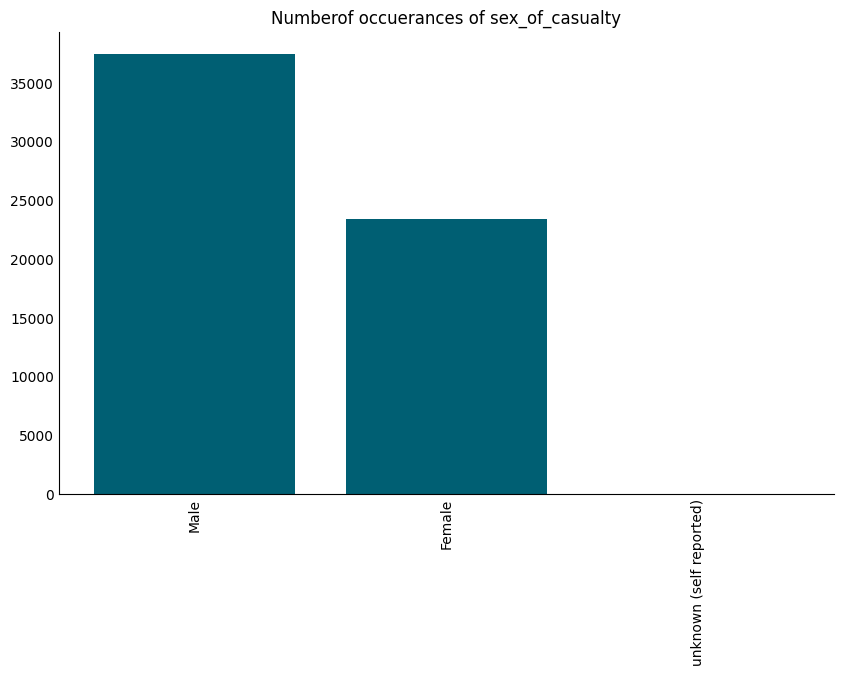

In [13]:
show_information(df, 'sex_of_casualty')

In [14]:
df.dropna(subset='sex_of_casualty', inplace=True)
df = df[df['sex_of_casualty'] != 'unknown (self reported)']

sex_of_casualty has 2 Unique Values 

sex_of_casualty
Male      37452
Female    23442
Name: count, dtype: int64
    


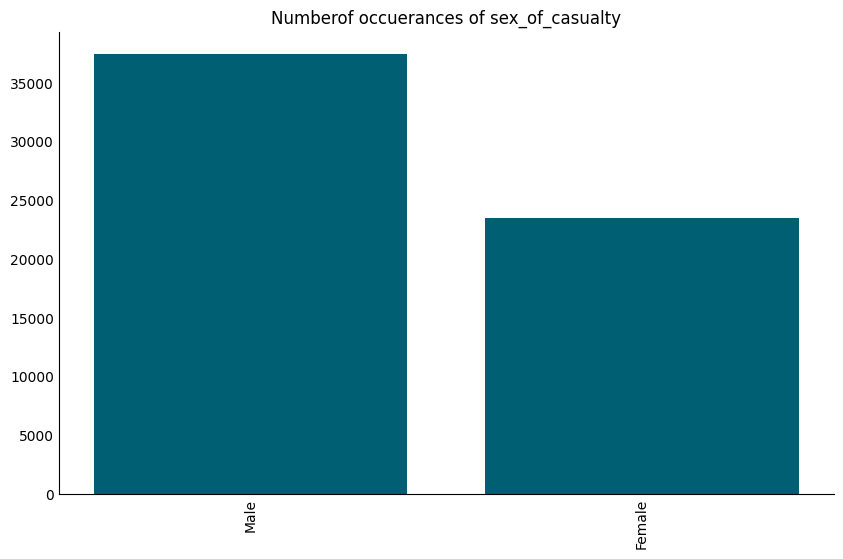

In [15]:
show_information(df, 'sex_of_casualty')

In [16]:
df.isna().sum()

status                                   0
accident_index                           0
accident_year                            0
accident_reference                       0
vehicle_reference                        0
casualty_reference                       0
casualty_class                           0
sex_of_casualty                          0
age_of_casualty                       1068
age_band_of_casualty                  1068
casualty_severity                        0
pedestrian_location                      0
pedestrian_movement                      0
car_passenger                          314
bus_or_coach_passenger                  23
pedestrian_road_maintenance_worker     113
casualty_type                            5
casualty_home_area_type               5394
casualty_imd_decile                   5678
lsoa_of_casualty                         0
dtype: int64

#### Handling Missing Values for age_of_casualty and age_band_of_casualty
* I will fill the age with **median** value of the ages and then fill age_band of casualty with according string.

age_of_casualty has 101 Unique Values 

age_of_casualty
18.0     1595
19.0     1517
21.0     1427
20.0     1400
22.0     1383
         ... 
96.0        4
99.0        4
97.0        3
98.0        2
101.0       1
Name: count, Length: 101, dtype: int64
    


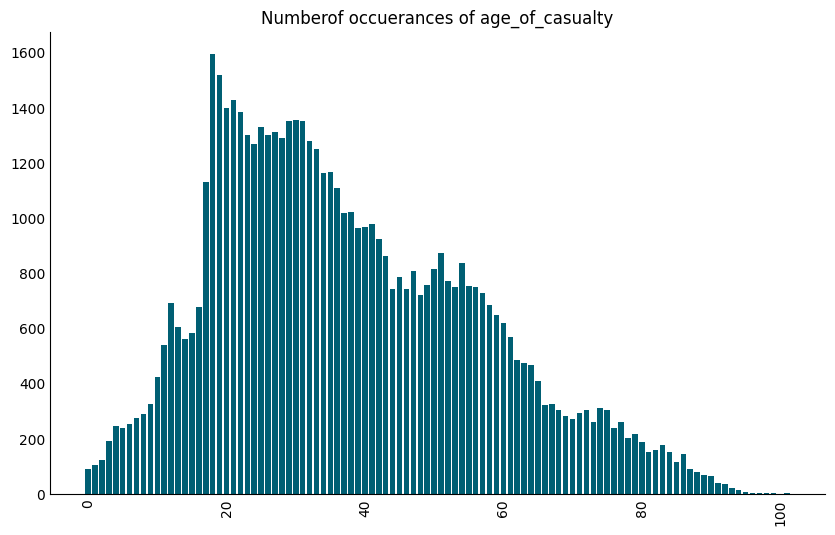

In [17]:
show_information(df, 'age_of_casualty', sort=False)

In [18]:
df['age_of_casualty'].mean(), df['age_of_casualty'].median()

(37.53237722729248, 34.0)

age_band_of_casualty has 11 Unique Values 

age_band_of_casualty
26 - 35    12814
36 - 45     9369
46 - 55     7826
21 - 25     6707
16 - 20     6318
56 - 65     5834
11 - 15     2979
66 - 75     2977
Over 75     2442
6 - 10      1567
0 - 5        993
Name: count, dtype: int64
    


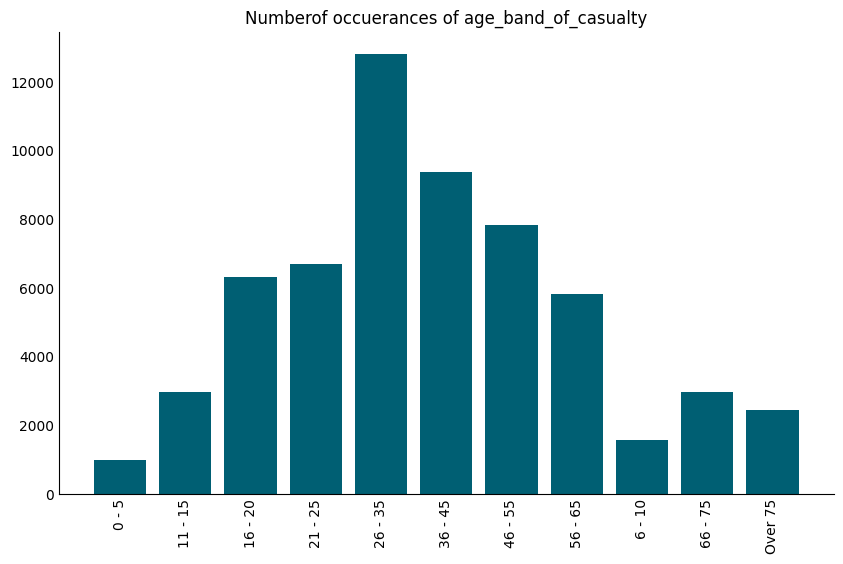

In [19]:
show_information(df, 'age_band_of_casualty', sort=False)

In [20]:
df['age_of_casualty'].fillna(df['age_of_casualty'].median(), inplace=True)
df['age_band_of_casualty'].fillna('26 - 35', inplace=True)

In [21]:
df.isna().sum()

status                                   0
accident_index                           0
accident_year                            0
accident_reference                       0
vehicle_reference                        0
casualty_reference                       0
casualty_class                           0
sex_of_casualty                          0
age_of_casualty                          0
age_band_of_casualty                     0
casualty_severity                        0
pedestrian_location                      0
pedestrian_movement                      0
car_passenger                          314
bus_or_coach_passenger                  23
pedestrian_road_maintenance_worker     113
casualty_type                            5
casualty_home_area_type               5394
casualty_imd_decile                   5678
lsoa_of_casualty                         0
dtype: int64

#### Handling Missing Values for car_passenger
* I am going to replace nan and Unknown values with No car passenger since most of the data is like this.

car_passenger has 4 Unique Values 

car_passenger
Not car passenger          50975
Front seat passenger        6057
Rear seat passenger         3494
unknown (self reported)       54
Name: count, dtype: int64
    


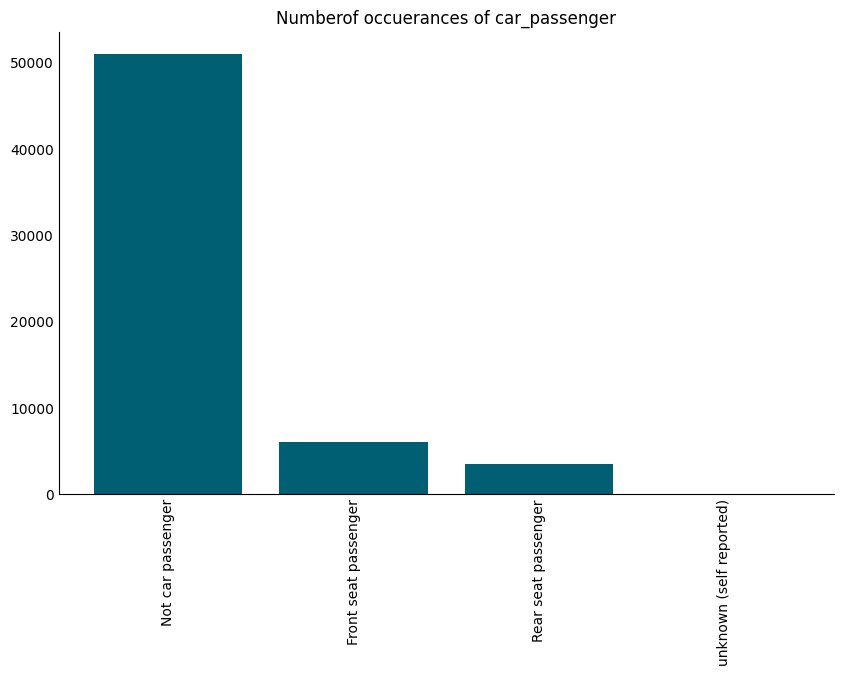

In [22]:
show_information(df, 'car_passenger')

In [23]:
df['car_passenger'].fillna('Not car passenger', inplace=True)
df.loc[df['car_passenger'] == 'unknown (self reported)', 'car_passenger'] = 'Not car passenger'


car_passenger has 3 Unique Values 

car_passenger
Not car passenger       51343
Front seat passenger     6057
Rear seat passenger      3494
Name: count, dtype: int64
    


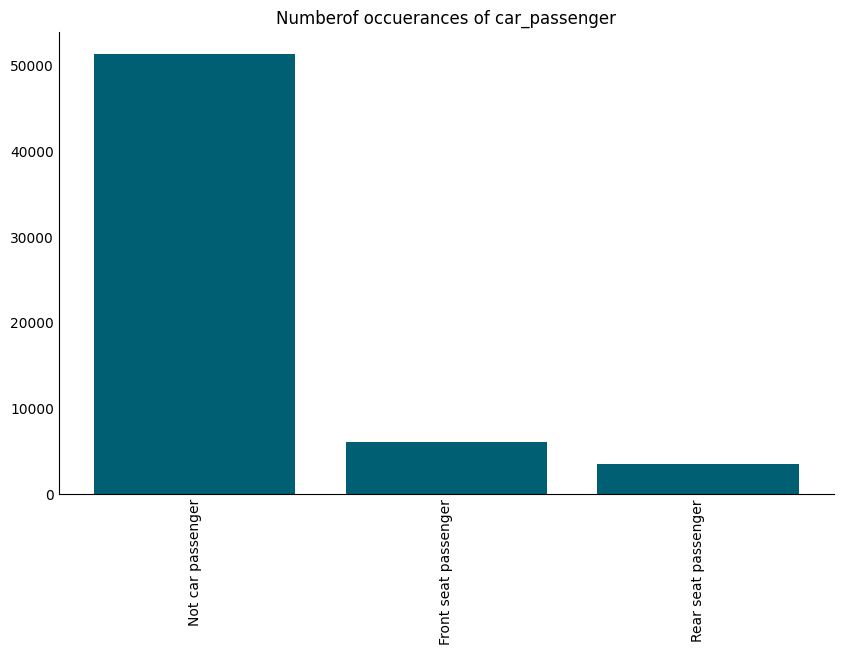

In [24]:
show_information(df, 'car_passenger')

In [25]:
df.isna().sum()

status                                   0
accident_index                           0
accident_year                            0
accident_reference                       0
vehicle_reference                        0
casualty_reference                       0
casualty_class                           0
sex_of_casualty                          0
age_of_casualty                          0
age_band_of_casualty                     0
casualty_severity                        0
pedestrian_location                      0
pedestrian_movement                      0
car_passenger                            0
bus_or_coach_passenger                  23
pedestrian_road_maintenance_worker     113
casualty_type                            5
casualty_home_area_type               5394
casualty_imd_decile                   5678
lsoa_of_casualty                         0
dtype: int64

#### Handling Missing Values for bus_or_coach_passenger


bus_or_coach_passenger has 6 Unique Values 

bus_or_coach_passenger
Not a bus or coach passenger    60020
Seated passenger                  489
Standing passenger                263
Alighting                          58
Boarding                           32
unknown (self reported)             9
Name: count, dtype: int64
    


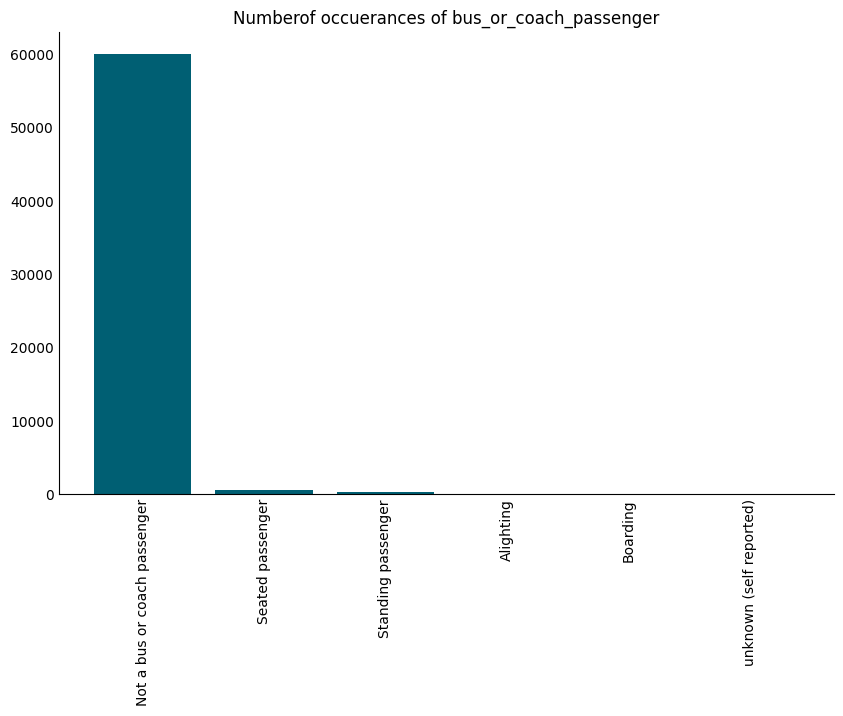

In [26]:
show_information(df, 'bus_or_coach_passenger')

In [27]:
df['bus_or_coach_passenger'].fillna('Not a bus or coach passenger', inplace=True)
df.loc[df['bus_or_coach_passenger'] == 'unknown (self reported)', 'bus_or_coach_passenger'] = 'Not a bus or coach passenger'


bus_or_coach_passenger has 5 Unique Values 

bus_or_coach_passenger
Not a bus or coach passenger    60052
Seated passenger                  489
Standing passenger                263
Alighting                          58
Boarding                           32
Name: count, dtype: int64
    


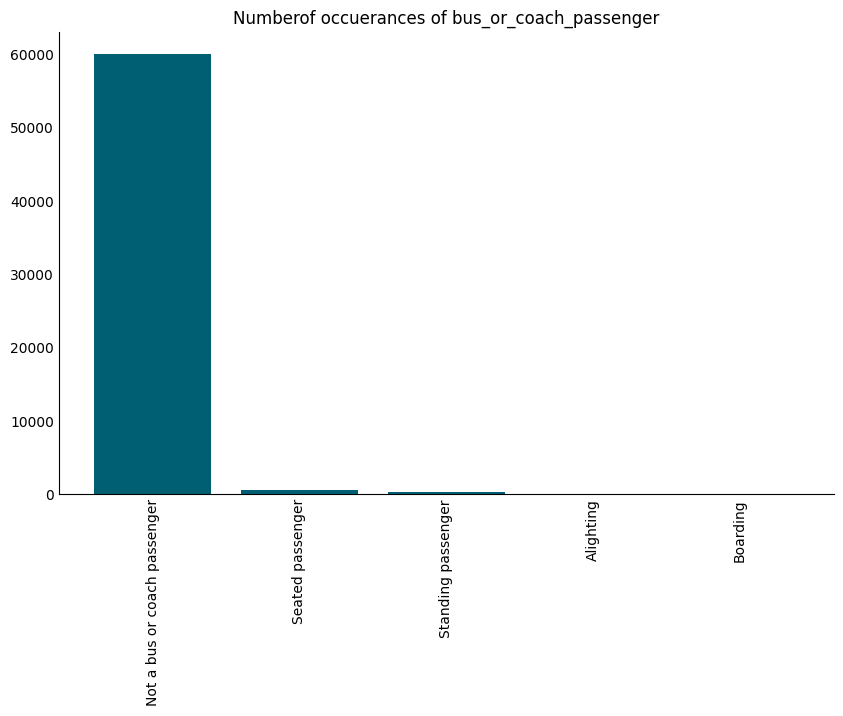

In [28]:
show_information(df, 'bus_or_coach_passenger')

In [29]:
df.isna().sum()

status                                   0
accident_index                           0
accident_year                            0
accident_reference                       0
vehicle_reference                        0
casualty_reference                       0
casualty_class                           0
sex_of_casualty                          0
age_of_casualty                          0
age_band_of_casualty                     0
casualty_severity                        0
pedestrian_location                      0
pedestrian_movement                      0
car_passenger                            0
bus_or_coach_passenger                   0
pedestrian_road_maintenance_worker     113
casualty_type                            5
casualty_home_area_type               5394
casualty_imd_decile                   5678
lsoa_of_casualty                         0
dtype: int64

#### Handling Missing Values for pedestrian_road_maintenance_worker


pedestrian_road_maintenance_worker has 3 Unique Values 

pedestrian_road_maintenance_worker
No / Not applicable    59659
Not Known               1007
Yes                      115
Name: count, dtype: int64
    


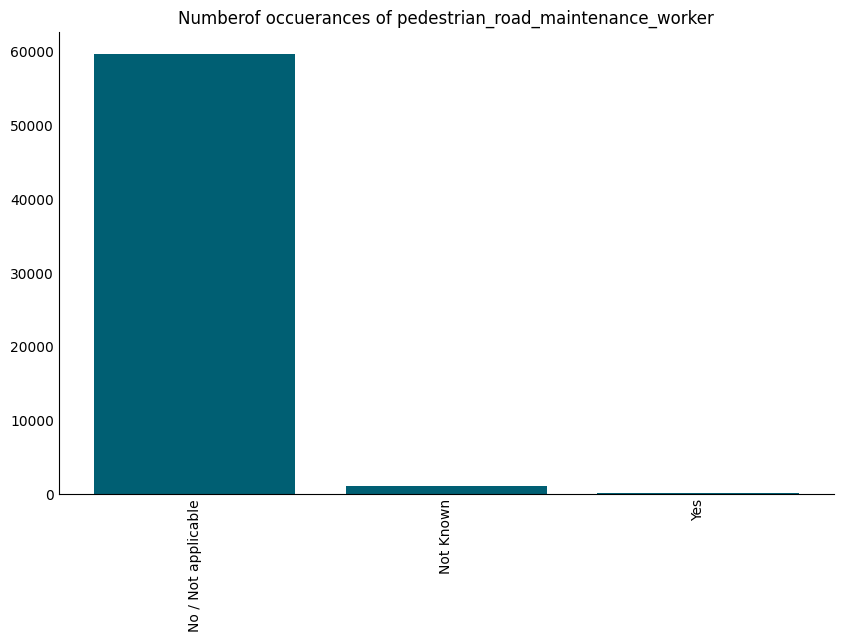

In [30]:
show_information(df, 'pedestrian_road_maintenance_worker')

In [31]:
df['pedestrian_road_maintenance_worker'].fillna('No / Not applicable', inplace=True)
df.loc[df['pedestrian_road_maintenance_worker'] == 'Not Known', 'pedestrian_road_maintenance_worker'] = 'No / Not applicable'


pedestrian_road_maintenance_worker has 2 Unique Values 

pedestrian_road_maintenance_worker
No / Not applicable    60779
Yes                      115
Name: count, dtype: int64
    


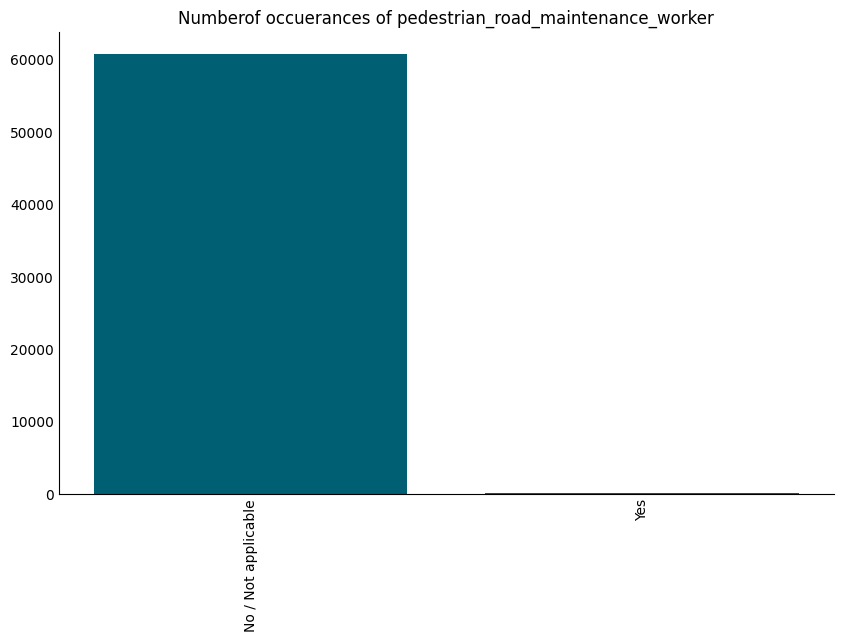

In [32]:
show_information(df, 'pedestrian_road_maintenance_worker')

In [33]:
df.isna().sum()

status                                   0
accident_index                           0
accident_year                            0
accident_reference                       0
vehicle_reference                        0
casualty_reference                       0
casualty_class                           0
sex_of_casualty                          0
age_of_casualty                          0
age_band_of_casualty                     0
casualty_severity                        0
pedestrian_location                      0
pedestrian_movement                      0
car_passenger                            0
bus_or_coach_passenger                   0
pedestrian_road_maintenance_worker       0
casualty_type                            5
casualty_home_area_type               5394
casualty_imd_decile                   5678
lsoa_of_casualty                         0
dtype: int64

#### Handling Missing Values for casualty_type


casualty_type has 21 Unique Values 

casualty_type
Car occupant                                                 32432
Pedestrian                                                    8919
Cyclist                                                       7078
Motorcycle 125cc and under rider or passenger                 3604
Motorcycle over 500cc rider or passenger                      1788
Van / Goods vehicle (3.5 tonnes mgw or under) occupant        1438
Bus or coach occupant (17 or more pass seats)                  964
Motorcycle - unknown cc rider or passenger                     857
Other vehicle occupant                                         824
Motorcycle over 125cc and up to 500cc rider or  passenger      819
Taxi/Private hire car occupant                                 686
Goods vehicle (unknown weight) occupant                        420
Motorcycle 50cc and under rider or passenger                   410
Goods vehicle (7.5 tonnes mgw and over) occupant               178
Electric mo

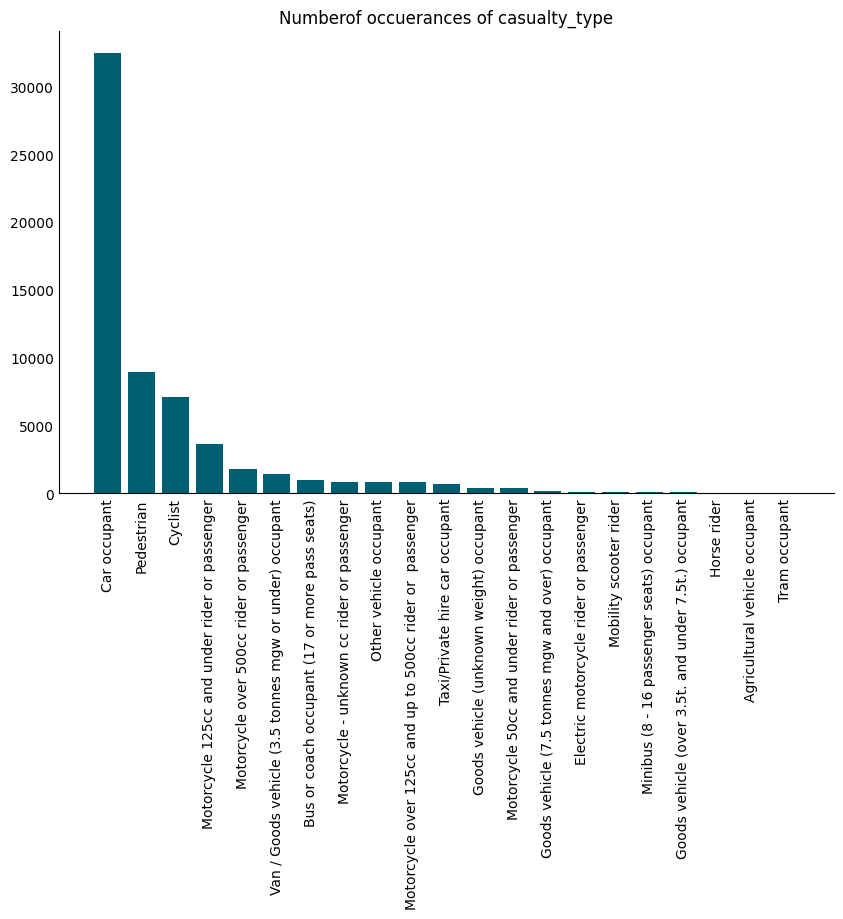

In [34]:
show_information(df, 'casualty_type')

In [35]:
df[df['casualty_type'].isna()]

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
11019,Unvalidated,2022340WNC442,2022,340WNC442,2,1,Driver or rider,Female,57.0,56 - 65,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,NaN,NaN,NaN,-1
24876,Unvalidated,2022201181474,2022,201181474,1,1,Driver or rider,Male,59.0,56 - 65,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,NaN,Rural,Less deprived 10-20%,E01029617
31340,Unvalidated,2022061140396,2022,061140396,1,1,Passenger,Male,55.0,46 - 55,Serious,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,NaN,Urban area,Most deprived 10%,E01005822
31939,Unvalidated,2022101182432,2022,101182432,2,1,Driver or rider,Male,34.0,26 - 35,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,NaN,Urban area,Less deprived 10-20%,E01008369
57485,Unvalidated,2022061178181,2022,061178181,2,1,Driver or rider,Male,75.0,66 - 75,Serious,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,NaN,Urban area,Less deprived 40-50%,E01024991


In [36]:
df['casualty_type'].fillna('Car occupant', inplace=True)

In [37]:
df.isna().sum()

status                                   0
accident_index                           0
accident_year                            0
accident_reference                       0
vehicle_reference                        0
casualty_reference                       0
casualty_class                           0
sex_of_casualty                          0
age_of_casualty                          0
age_band_of_casualty                     0
casualty_severity                        0
pedestrian_location                      0
pedestrian_movement                      0
car_passenger                            0
bus_or_coach_passenger                   0
pedestrian_road_maintenance_worker       0
casualty_type                            0
casualty_home_area_type               5394
casualty_imd_decile                   5678
lsoa_of_casualty                         0
dtype: int64

#### Handling Missing Values for casualty_home_area_type
* Since the missing values hold about 10 percent of the data, I filled them with a fourth value called 'Other'

casualty_home_area_type has 3 Unique Values 

casualty_home_area_type
Urban area    44929
Rural          5996
Small town     4575
Name: count, dtype: int64
    


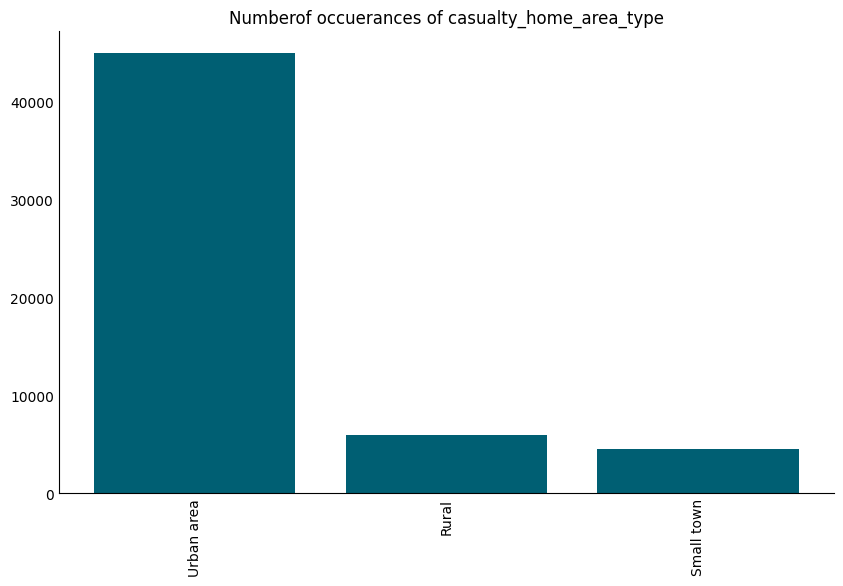

In [38]:
show_information(df, 'casualty_home_area_type')

In [39]:
df['casualty_home_area_type'].fillna('Other', inplace=True)

casualty_home_area_type has 4 Unique Values 

casualty_home_area_type
Urban area    44929
Rural          5996
Other          5394
Small town     4575
Name: count, dtype: int64
    


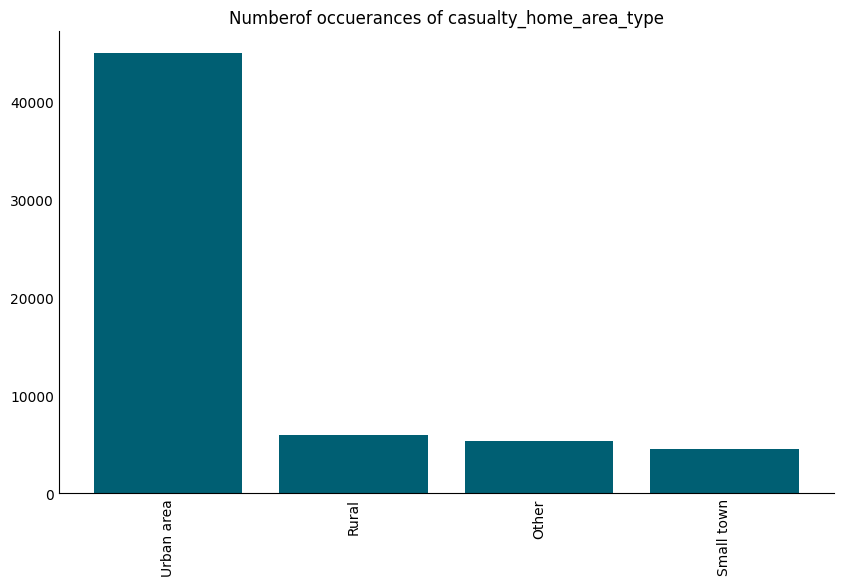

In [40]:
show_information(df, 'casualty_home_area_type')

#### Handling Missing Values for casualty_imd_decile
* Since the missing values hold about 10 percent of the data, I filled them with a fourth value called 'Other'

casualty_imd_decile has 10 Unique Values 

casualty_imd_decile
More deprived 10-20%    7100
Most deprived 10%       6875
More deprived 20-30%    6837
More deprived 30-40%    6222
More deprived 40-50%    5735
Less deprived 40-50%    5304
Less deprived 30-40%    4930
Less deprived 20-30%    4544
Less deprived 10-20%    4064
Least deprived 10%      3605
Name: count, dtype: int64
    


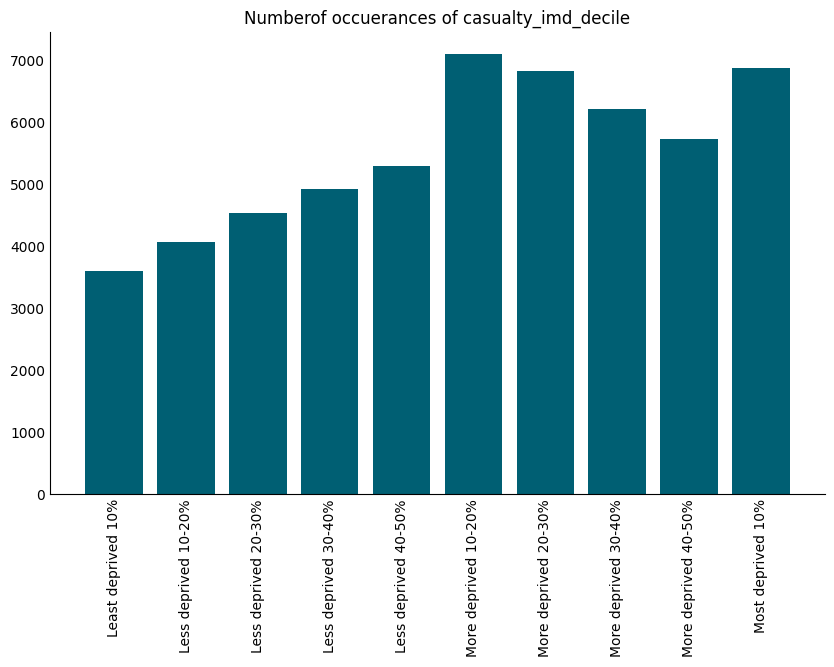

In [41]:
show_information(df, 'casualty_imd_decile', sort=False)

In [42]:
df[df['casualty_imd_decile'].isna()].groupby('casualty_home_area_type')['casualty_home_area_type'].count()

casualty_home_area_type
Other         5394
Rural           61
Small town      40
Urban area     183
Name: casualty_home_area_type, dtype: int64

In [43]:
df['casualty_imd_decile'].fillna('Other / Unknown', inplace=True)

In [44]:
df.isna().sum()

status                                0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
lsoa_of_casualty                      0
dtype: int64

In [45]:
df.to_csv('no_missing_data.csv')

### Data Type Conversions

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60894 entries, 0 to 61351
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   status                              60894 non-null  object 
 1   accident_index                      60894 non-null  object 
 2   accident_year                       60894 non-null  int64  
 3   accident_reference                  60894 non-null  object 
 4   vehicle_reference                   60894 non-null  int64  
 5   casualty_reference                  60894 non-null  int64  
 6   casualty_class                      60894 non-null  object 
 7   sex_of_casualty                     60894 non-null  object 
 8   age_of_casualty                     60894 non-null  float64
 9   age_band_of_casualty                60894 non-null  object 
 10  casualty_severity                   60894 non-null  object 
 11  pedestrian_location                 60894 non-

In [47]:
# Convert categorical columns to 'category' data type
categorical_columns = ['status', 'accident_index', 'accident_reference', 'casualty_class', 
                       'sex_of_casualty', 'casualty_severity', 'pedestrian_location', 'age_band_of_casualty',
                       'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger', 
                       'pedestrian_road_maintenance_worker', 'casualty_type', 
                       'casualty_home_area_type', 'casualty_imd_decile', 'lsoa_of_casualty']

for column in categorical_columns:
    df[column] = df[column].astype('category')

# Check data types to confirm changes
df.dtypes

status                                category
accident_index                        category
accident_year                            int64
accident_reference                    category
vehicle_reference                        int64
casualty_reference                       int64
casualty_class                        category
sex_of_casualty                       category
age_of_casualty                        float64
age_band_of_casualty                  category
casualty_severity                     category
pedestrian_location                   category
pedestrian_movement                   category
car_passenger                         category
bus_or_coach_passenger                category
pedestrian_road_maintenance_worker    category
casualty_type                         category
casualty_home_area_type               category
casualty_imd_decile                   category
lsoa_of_casualty                      category
dtype: object

In [48]:
df.head()

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,Driver or rider,Female,46.0,46 - 55,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Less deprived 10-20%,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,Driver or rider,Male,30.0,26 - 35,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 10-20%,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,Driver or rider,Female,58.0,56 - 65,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Least deprived 10%,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,Driver or rider,Female,78.0,Over 75,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Least deprived 10%,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,Driver or rider,Male,63.0,56 - 65,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Rural,Less deprived 30-40%,W01000578


### Feature Engineering
1. Age Category

2. Casualty Count of Each Accident

3. Accident Count of Each Location

4. Locations : For this feature I need to work harder and find new Data to extract from

#### Age Category

In [49]:
# Apply the function to create a new column 'age_group'
df['age_group'] = df['age_of_casualty'].apply(categorize_age)

# Convert 'age_group' to a categorical type
df['age_group'] = df['age_group'].astype('category')

# Display the distribution of the new 'age_group' column to verify our feature engineering
df['age_group'].value_counts()

age_group
Adult          28640
Young Adult    16470
Senior          8439
Youth           7345
Name: count, dtype: int64

#### Casualty Count of Each Accident

In [50]:
# Calculate the count of casualties in each accident
casualties_count = df.groupby('accident_index')['casualty_reference'].count().reset_index(name='casualties_count')

# Merge this information back into the original dataframe
df = df.merge(casualties_count, on='accident_index', how='left')

# Display the first few rows to verify the new 'casualties_count' feature
df[['accident_index', 'casualties_count']].head()

,accident_index,casualties_count
0,2022070151244,1
1,2022070152668,1
2,2022070154696,6
3,2022070154696,6
4,2022070154696,6


#### Accident Count of Each Location

In [51]:
# Calculate the count of accidents in each location
accidents_count = df.groupby('lsoa_of_casualty')['accident_index'].nunique().reset_index(name='accidents_count')

# Merge this information back into the original dataframe
df = df.merge(accidents_count, on='lsoa_of_casualty', how='left')

# Display the first few rows to verify the new 'accidents_count' feature
df[['lsoa_of_casualty', 'accidents_count']].head()

,lsoa_of_casualty,accidents_count
0,E01033378,2
1,E01018551,5
2,E01006134,1
3,E01018724,3
4,W01000578,2


In [52]:
df

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,...,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty,age_group,casualties_count,accidents_count
0,Unvalidated,2022070151244,2022,070151244,2,1,Driver or rider,Female,46.0,46 - 55,...,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Less deprived 10-20%,E01033378,Adult,1,2
1,Unvalidated,2022070152668,2022,070152668,1,1,Driver or rider,Male,30.0,26 - 35,...,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 10-20%,E01018551,Adult,1,5
2,Unvalidated,2022070154696,2022,070154696,1,1,Driver or rider,Female,58.0,56 - 65,...,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Least deprived 10%,E01006134,Adult,6,1
3,Unvalidated,2022070154696,2022,070154696,2,3,Driver or rider,Female,78.0,Over 75,...,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Least deprived 10%,E01018724,Senior,6,3
4,Unvalidated,2022070154696,2022,070154696,3,2,Driver or rider,Male,63.0,56 - 65,...,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Rural,Less deprived 30-40%,W01000578,Senior,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60889,Unvalidated,2022461156711,2022,461156711,1,1,Pedestrian,Female,56.0,56 - 65,...,Not car passenger,Not a bus or coach passenger,No / Not applicable,Pedestrian,Urban area,Least deprived 10%,E01024046,Adult,1,4
60890,Unvalidated,2022461157243,2022,461157243,1,1,Pedestrian,Male,14.0,11 - 15,...,Not car passenger,Not a bus or coach passenger,No / Not applicable,Pedestrian,Other,Other / Unknown,-1,Youth,1,6620
60891,Unvalidated,2022461157256,2022,461157256,2,1,Driver or rider,Male,42.0,36 - 45,...,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 40-50%,E01016034,Adult,1,3
60892,Unvalidated,2022461157316,2022,461157316,1,1,Driver or rider,Female,40.0,36 - 45,...,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 20-30%,E01024497,Adult,1,6


In [53]:
df.to_csv('featured_data(no location).csv')

#### Location Name, Longitude, Latitude

In [54]:
external_path = 'external/Police Reports Data/'
dataframes = []

for file in os.listdir('external/Police Reports Data'):
    temp_df = pd.read_csv(external_path + file)
    dataframes.append(temp_df)

# Concatenate all the DataFrames in the list
police_df = pd.concat(dataframes, ignore_index=True)
police_df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2023-12,North Yorkshire Police,North Yorkshire Police,-1.750291,53.914209,On or near Park Row,E01010769,Bradford 003C,Anti-social behaviour,NaN,NaN
1,c2d0d5e9700fc84de12292fafd4da539374afd347b934e...,2023-12,North Yorkshire Police,North Yorkshire Police,-1.751662,53.914203,On or near Hill Top,E01010769,Bradford 003C,Public order,Under investigation,NaN
2,177f05b52d350d151b26f5e05890b0a375923d0477269b...,2023-12,North Yorkshire Police,North Yorkshire Police,-2.002397,53.870949,On or near Long Gate,E01010855,Bradford 023B,Burglary,Under investigation,NaN
3,b31eeb8a7ff3d249f1e12ca77abfd45f0b3c0b7b2ac2f7...,2023-12,North Yorkshire Police,North Yorkshire Police,-2.002397,53.870949,On or near Long Gate,E01010855,Bradford 023B,Criminal damage and arson,Investigation complete; no suspect identified,NaN
4,1cd7dcc10d993255fba0b77456d2f23e61c0805ad4a4a6...,2023-12,North Yorkshire Police,North Yorkshire Police,-1.962695,53.898015,On or near Hospital,E01010645,Bradford 062C,Violence and sexual offences,Unable to prosecute suspect,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
434252,5ad8bd5eff2402bd875d462eac8b43fc92bb00efc430e9...,2023-12,Lincolnshire Police,Lincolnshire Police,-0.445114,53.250013,On or near Dawsons Lane,E01026371,West Lindsey 011D,Violence and sexual offences,Unable to prosecute suspect,NaN
434253,4397f33a4bf412e9b8a30bc90617bbb6d38536cf0e5cea...,2023-12,Lincolnshire Police,Lincolnshire Police,-0.408209,53.275111,On or near Scothern Lane,E01026373,West Lindsey 011E,Other theft,Investigation complete; no suspect identified,NaN
434254,08161d428adb39c95fe7084bd37e7e23d22a3c13acd7c0...,2023-12,Lincolnshire Police,Lincolnshire Police,-0.430771,53.236871,On or near Waterhill,E01026373,West Lindsey 011E,Vehicle crime,Under investigation,NaN
434255,594c3d9bf94f50ee2a4349d18a2ede622512a6100f0375...,2023-12,Lincolnshire Police,Lincolnshire Police,-0.403334,53.271926,On or near Barlings Lane,E01026373,West Lindsey 011E,Violence and sexual offences,Under investigation,NaN


In [55]:
locations = police_df.drop_duplicates(subset='LSOA code')
locations = locations[['LSOA code', 'LSOA name', 'Location', 'Longitude', 'Latitude']]
locations.rename(columns={'LSOA code': 'lsoa_of_casualty'}, inplace=True)

In [56]:
df = df.merge(locations, on='lsoa_of_casualty', how='left')
df

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,...,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty,age_group,casualties_count,accidents_count,LSOA name,Location,Longitude,Latitude
0,Unvalidated,2022070151244,2022,070151244,2,1,Driver or rider,Female,46.0,46 - 55,...,Urban area,Less deprived 10-20%,E01033378,Adult,1,2,Cheshire East 053E,On or near Newcastle Road,-2.488437,53.061740
1,Unvalidated,2022070152668,2022,070152668,1,1,Driver or rider,Male,30.0,26 - 35,...,Urban area,More deprived 10-20%,E01018551,Adult,1,5,Cheshire West and Chester 011C,On or near Flint Court,-2.889868,53.267739
2,Unvalidated,2022070154696,2022,070154696,1,1,Driver or rider,Female,58.0,56 - 65,...,Urban area,Least deprived 10%,E01006134,Adult,6,1,NaN,NaN,NaN,NaN
3,Unvalidated,2022070154696,2022,070154696,2,3,Driver or rider,Female,78.0,Over 75,...,Small town,Least deprived 10%,E01018724,Senior,6,3,Cheshire West and Chester 045C,On or near Oathills Close,-2.664853,53.156260
4,Unvalidated,2022070154696,2022,070154696,3,2,Driver or rider,Male,63.0,56 - 65,...,Rural,Less deprived 30-40%,W01000578,Senior,6,2,Pembrokeshire 014B,On or near Foss Way,-4.887997,51.697906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60889,Unvalidated,2022461156711,2022,461156711,1,1,Pedestrian,Female,56.0,56 - 65,...,Urban area,Least deprived 10%,E01024046,Adult,1,4,Canterbury 016C,On or near Appledown Way,1.101882,51.263427
60890,Unvalidated,2022461157243,2022,461157243,1,1,Pedestrian,Male,14.0,11 - 15,...,Other,Other / Unknown,-1,Youth,1,6620,NaN,NaN,NaN,NaN
60891,Unvalidated,2022461157256,2022,461157256,2,1,Driver or rider,Male,42.0,36 - 45,...,Urban area,More deprived 40-50%,E01016034,Adult,1,3,Medway 010C,On or near Groombridge Drive,0.568862,51.388541
60892,Unvalidated,2022461157316,2022,461157316,1,1,Driver or rider,Female,40.0,36 - 45,...,Urban area,More deprived 20-30%,E01024497,Adult,1,6,Folkestone and Hythe 003B,On or near Ingoldsby Road,1.186905,51.091614


### Final Cleaning After Feature Engineering

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60894 entries, 0 to 60893
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   status                              60894 non-null  category
 1   accident_index                      60894 non-null  category
 2   accident_year                       60894 non-null  int64   
 3   accident_reference                  60894 non-null  category
 4   vehicle_reference                   60894 non-null  int64   
 5   casualty_reference                  60894 non-null  int64   
 6   casualty_class                      60894 non-null  category
 7   sex_of_casualty                     60894 non-null  category
 8   age_of_casualty                     60894 non-null  float64 
 9   age_band_of_casualty                60894 non-null  category
 10  casualty_severity                   60894 non-null  category
 11  pedestrian_location         

In [58]:
df.isna().sum()

status                                    0
accident_index                            0
accident_year                             0
accident_reference                        0
vehicle_reference                         0
casualty_reference                        0
casualty_class                            0
sex_of_casualty                           0
age_of_casualty                           0
age_band_of_casualty                      0
casualty_severity                         0
pedestrian_location                       0
pedestrian_movement                       0
car_passenger                             0
bus_or_coach_passenger                    0
pedestrian_road_maintenance_worker        0
casualty_type                             0
casualty_home_area_type                   0
casualty_imd_decile                       0
lsoa_of_casualty                          0
age_group                                 0
casualties_count                          0
accidents_count                 

#### LSOA name

In [59]:
show_information(df, 'LSOA name', plot=False)

LSOA name has 20612 Unique Values 

LSOA name
Haringey 025C      13
Haringey 002A      13
Croydon 003C       12
Brent 025B         12
Haringey 018B      12
                   ..
Coventry 007E       1
Birmingham 118A     1
Solihull 021C       1
Sandwell 022F       1
Erewash 001A        1
Name: count, Length: 20612, dtype: int64
    


In [60]:
df['LSOA name'].fillna('Unknown', inplace=True)

#### Location

In [61]:
show_information(df, 'Location', plot=False)

Location has 15403 Unique Values 

Location
On or near Parking Area              1086
On or near Supermarket                854
On or near Petrol Station             604
On or near Sports/Recreation Area     454
On or near Shopping Area              360
                                     ... 
On or near Palmer Street                1
On or near Wood End Road                1
On or near Marmora Road                 1
On or near The Hennalls                 1
On or near William Kett Close           1
Name: count, Length: 15403, dtype: int64
    


In [62]:
show_information(df, 'Location', plot=False)

Location has 15403 Unique Values 

Location
On or near Parking Area              1086
On or near Supermarket                854
On or near Petrol Station             604
On or near Sports/Recreation Area     454
On or near Shopping Area              360
                                     ... 
On or near Palmer Street                1
On or near Wood End Road                1
On or near Marmora Road                 1
On or near The Hennalls                 1
On or near William Kett Close           1
Name: count, Length: 15403, dtype: int64
    


In [63]:
df['Location'].fillna('Unknown', inplace=True)

#### Longitude

In [64]:
show_information(df, 'Longitude', plot=False)

Longitude has 20539 Unique Values 

Longitude
-0.065640    13
-0.063940    13
-0.072884    12
-0.121101    12
-2.219007    12
             ..
-1.849950     1
-2.055029     1
-1.357764     1
-0.906028     1
-2.781083     1
Name: count, Length: 20539, dtype: int64
    


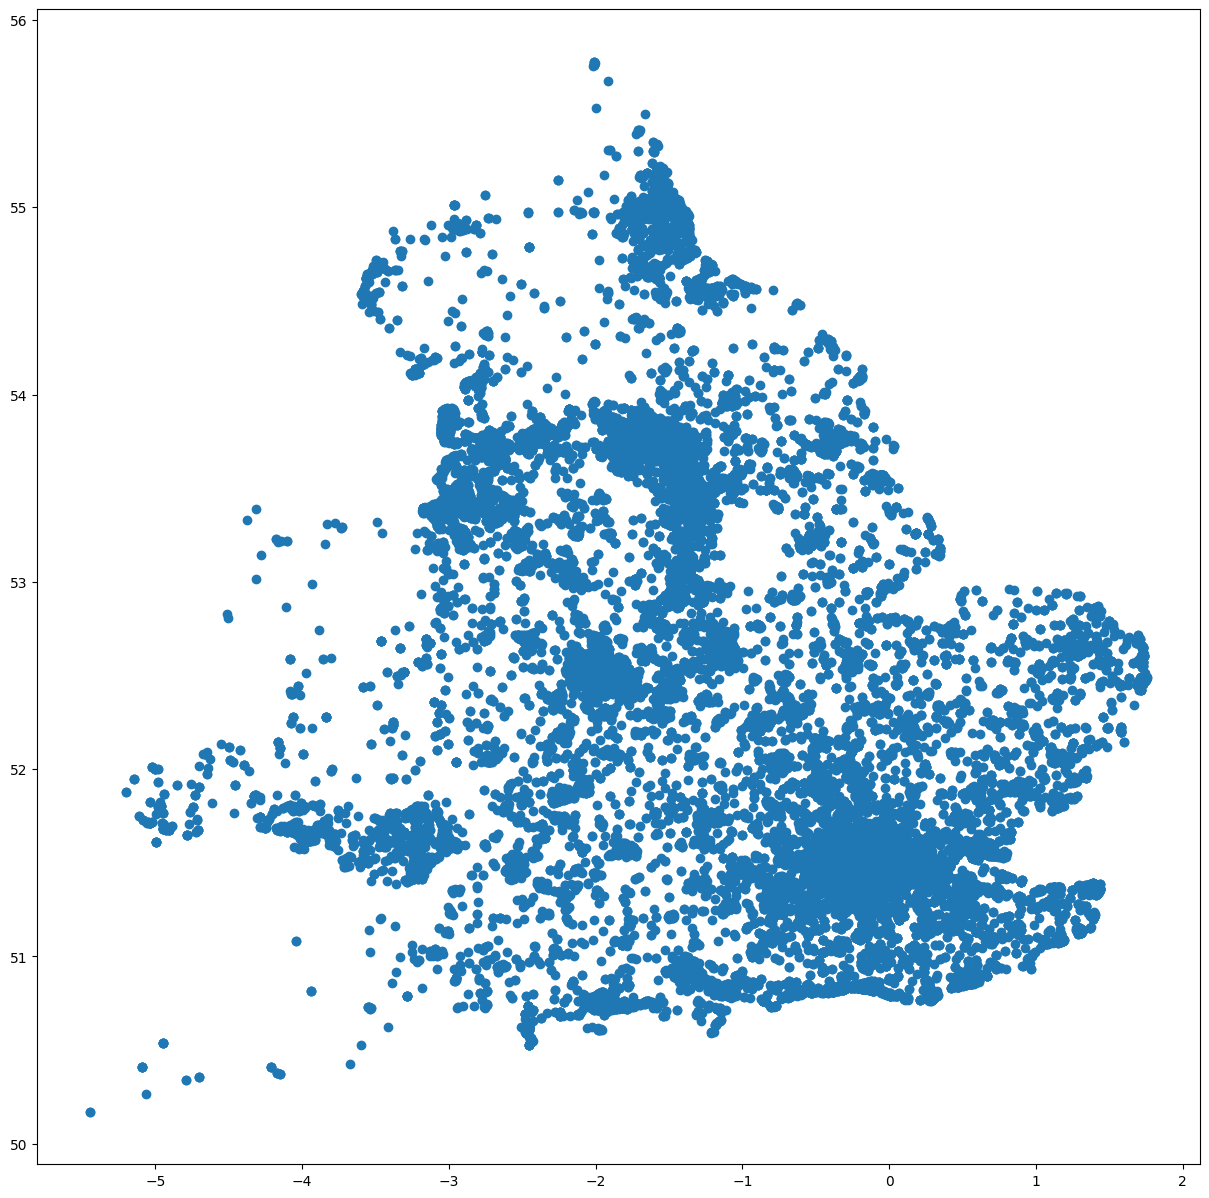

In [65]:
plt.figure(figsize=(15, 15))
plt.scatter(df['Longitude'], df['Latitude'])
plt.show()

In [66]:
df.to_csv('clean_df.csv')

## Checking Each Numerical Column

* **accident_year**
    * This column shows the year and only has one value : 2022

* **vehicle_reference**
    * This column shows what kind of vehicle was in the accident and since most of the data is the type shown with number below 10, I will drop the others. I may even drop numbers greater than 7 since they do not contribute any value to the analysis

* **casualty_reference**
    * This columns shows how many casualties were in the accident and most of the data shows that there were less than 11 casualties in most of the accidents

* **age_of_casualty**
    * Shows the age of the caualties and there is a value (-1) where I will drop them


### **vehicle_reference**

In [67]:
df['vehicle_reference'].nunique(), df['vehicle_reference'].unique()

(11, array([  2,   1,   3,   4,   5,   8,   6,   9, 227,   7,  61]))

(<Axes: ylabel='Frequency'>,
 vehicle_reference
 1      35908
 2      23235
 3       1420
 4        226
 5         71
 6         18
 7          7
 8          4
 9          3
 227        1
 61         1
 Name: count, dtype: int64)

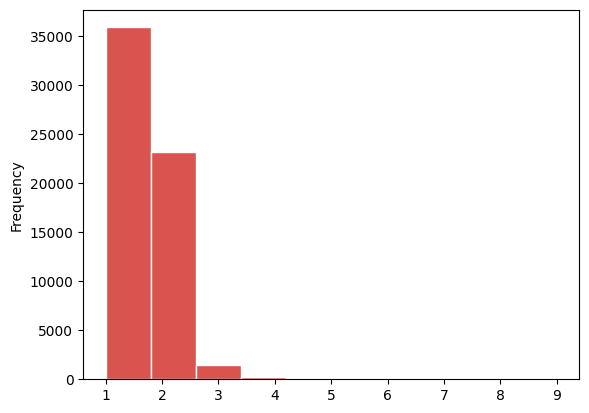

In [68]:
df[df['vehicle_reference'] < 10]['vehicle_reference'].plot(kind='hist', color='#d9534f', edgecolor='white'), df['vehicle_reference'].value_counts()

### **casualty_reference**

In [69]:
df['casualty_reference'].nunique(), df['casualty_reference'].unique()

(18,
 array([  1,   3,   2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  14,
         15,  13,  16,  22, 148]))

(<Axes: ylabel='Frequency'>,
 casualty_reference
 1      47569
 2       9138
 3       2754
 4        915
 5        319
 6         98
 7         37
 8         15
 9         11
 10        10
 11         7
 12         6
 14         4
 13         4
 15         3
 16         2
 22         1
 148        1
 Name: count, dtype: int64)

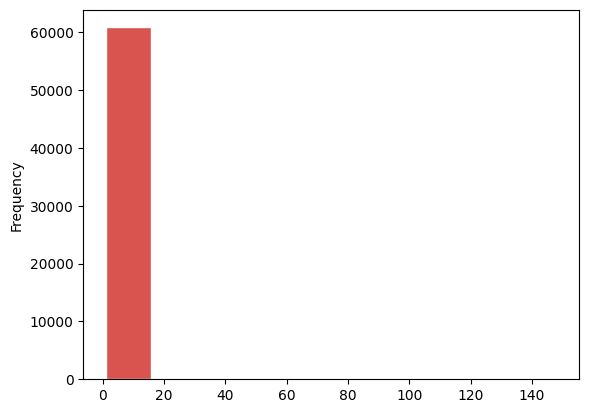

In [70]:
df['casualty_reference'].plot(kind='hist', color='#d9534f', edgecolor='white'), df['casualty_reference'].value_counts()

### **casualty_class**

In [71]:
df['casualty_class'].nunique(), df['casualty_class'].unique()

(3,
 ['Driver or rider', 'Passenger', 'Pedestrian']
 Categories (3, object): ['Driver or rider', 'Passenger', 'Pedestrian'])

### **sex_of_casualty**

In [72]:
df['sex_of_casualty'].nunique(), df['sex_of_casualty'].unique()

(2,
 ['Female', 'Male']
 Categories (2, object): ['Female', 'Male'])

### **age_of_casualty**

In [73]:
df['age_of_casualty'].nunique(), df['age_of_casualty'].unique()

(101,
 array([ 46.,  30.,  58.,  78.,  63.,  52.,  50.,  16.,  74.,  79.,  13.,
         48.,  45.,  28.,  54.,  42.,  33.,  34.,   7.,  20.,  24.,  18.,
         80.,  14.,  32.,  19.,  59.,  36.,  84.,  23.,  43.,  55.,   5.,
         31.,  25.,  26.,  21.,  72.,  15.,  22.,  47.,  86.,  76.,  61.,
         35.,  51.,  17.,  68.,  38.,  73.,  65.,  27.,  66.,  93.,  77.,
         60.,  69.,  41.,  67.,  91.,  70.,  40.,  29.,  57.,  37.,  53.,
         81.,  12.,  44.,  39.,  10.,   8.,  62.,  56.,  64.,  49.,   6.,
         75.,  92.,   3.,  11.,  71.,  82.,   9.,   4.,   2.,   0.,  87.,
          1.,  83.,  89.,  88.,  85.,  96.,  90.,  99.,  97.,  94.,  95.,
         98., 101.]))

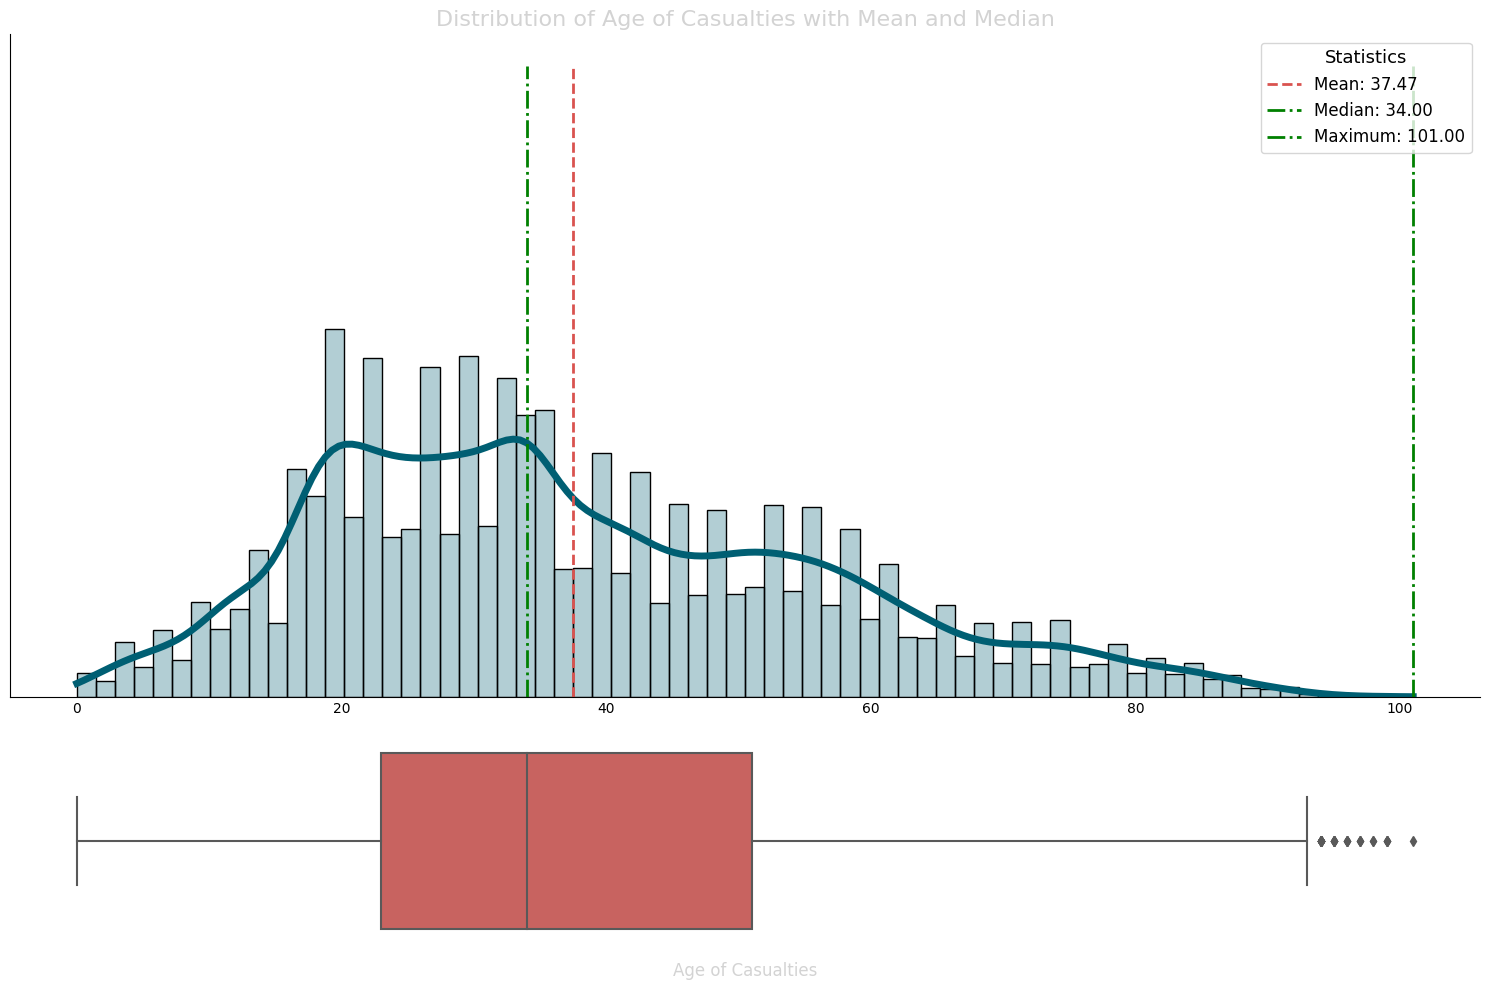

In [74]:
# Corrected plotting code
fig = plt.figure(figsize=(15, 10), facecolor='white') # Returns figure and array of axes

gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Axes are now in an array, so you access them using indices
ax1 = fig.add_subplot(gs[0])  # The first subplot
ax2 = fig.add_subplot(gs[1])  # The second subplot

# Plot histogram with KDE on the first axis
sns.histplot(data=df['age_of_casualty'], bins=70, color='#005f73', alpha=0.3, ax=ax1, kde=True, line_kws={'color': 'red', 'lw': 5}, legend=True)

# Mean and median lines
mean_val = df['age_of_casualty'].mean()
median_val = df['age_of_casualty'].median()
max_val = df['age_of_casualty'].max()
ax1.vlines(x=mean_val, ymin=0, ymax=5000, color='#d9534f', label=f'Mean: {mean_val:.2f}', linestyles='--', lw=2)
ax1.vlines(x=median_val, ymin=0, ymax=5000, color='green', label=f'Median: {median_val:.2f}', linestyles='-.', lw=2)
ax1.vlines(x=max_val, ymin=0, ymax=5000, color='green', label=f'Maximum: {max_val:.2f}', linestyles='-.', lw=2)

ax1.set_xlabel('')

ax1.spines[['right',  'top']].set_visible(False)
ax1.set_yticklabels([])

# Enhancements for the first plot
ax1.set_title('Distribution of Age of Casualties with Mean and Median', fontsize=16, color='lightgray')
ax2.set_xlabel('Age of Casualties', fontsize=14, color='lightgray')
ax1.set_ylabel('')

ax1.legend(title='Statistics', title_fontsize='13', fontsize='12', facecolor='white')
ax1.set_facecolor('whitesmoke')
ax1.tick_params(length=0)
ax1.set_facecolor('white')

# Plot boxplot on the second axis
sns.boxplot(x=df['age_of_casualty'], ax=ax2, color='#d9534f')

ax2.set_xlabel('Age of Casualties', fontsize=12)
ax2.spines[['right', 'left', 'top', 'bottom']].set_visible(False)
ax2.tick_params(length=0)
ax2.set_ylabel('')
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_facecolor('white')

plt.tight_layout()  # Adjust the layout
plt.show()

# Data Analysis

In [75]:
clean_df = pd.read_csv('clean_df.csv')
clean_df.head()

,Unnamed: 0,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,...,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty,age_group,casualties_count,accidents_count,LSOA name,Location,Longitude,Latitude
0,0,Unvalidated,2022070151244,2022,070151244,2,1,Driver or rider,Female,46.0,...,Urban area,Less deprived 10-20%,E01033378,Adult,1,2,Cheshire East 053E,On or near Newcastle Road,-2.488437,53.061740
1,1,Unvalidated,2022070152668,2022,070152668,1,1,Driver or rider,Male,30.0,...,Urban area,More deprived 10-20%,E01018551,Adult,1,5,Cheshire West and Chester 011C,On or near Flint Court,-2.889868,53.267739
2,2,Unvalidated,2022070154696,2022,070154696,1,1,Driver or rider,Female,58.0,...,Urban area,Least deprived 10%,E01006134,Adult,6,1,Unknown,Unknown,NaN,NaN
3,3,Unvalidated,2022070154696,2022,070154696,2,3,Driver or rider,Female,78.0,...,Small town,Least deprived 10%,E01018724,Senior,6,3,Cheshire West and Chester 045C,On or near Oathills Close,-2.664853,53.156260
4,4,Unvalidated,2022070154696,2022,070154696,3,2,Driver or rider,Male,63.0,...,Rural,Less deprived 30-40%,W01000578,Senior,6,2,Pembrokeshire 014B,On or near Foss Way,-4.887997,51.697906


In [76]:
clean_df.drop(columns=['Unnamed: 0', 'status'], inplace=True)

In [77]:
clean_df

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,...,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty,age_group,casualties_count,accidents_count,LSOA name,Location,Longitude,Latitude
0,2022070151244,2022,070151244,2,1,Driver or rider,Female,46.0,46 - 55,Slight,...,Urban area,Less deprived 10-20%,E01033378,Adult,1,2,Cheshire East 053E,On or near Newcastle Road,-2.488437,53.061740
1,2022070152668,2022,070152668,1,1,Driver or rider,Male,30.0,26 - 35,Slight,...,Urban area,More deprived 10-20%,E01018551,Adult,1,5,Cheshire West and Chester 011C,On or near Flint Court,-2.889868,53.267739
2,2022070154696,2022,070154696,1,1,Driver or rider,Female,58.0,56 - 65,Slight,...,Urban area,Least deprived 10%,E01006134,Adult,6,1,Unknown,Unknown,NaN,NaN
3,2022070154696,2022,070154696,2,3,Driver or rider,Female,78.0,Over 75,Slight,...,Small town,Least deprived 10%,E01018724,Senior,6,3,Cheshire West and Chester 045C,On or near Oathills Close,-2.664853,53.156260
4,2022070154696,2022,070154696,3,2,Driver or rider,Male,63.0,56 - 65,Slight,...,Rural,Less deprived 30-40%,W01000578,Senior,6,2,Pembrokeshire 014B,On or near Foss Way,-4.887997,51.697906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60889,2022461156711,2022,461156711,1,1,Pedestrian,Female,56.0,56 - 65,Slight,...,Urban area,Least deprived 10%,E01024046,Adult,1,4,Canterbury 016C,On or near Appledown Way,1.101882,51.263427
60890,2022461157243,2022,461157243,1,1,Pedestrian,Male,14.0,11 - 15,Serious,...,Other,Other / Unknown,-1,Youth,1,6620,Unknown,Unknown,NaN,NaN
60891,2022461157256,2022,461157256,2,1,Driver or rider,Male,42.0,36 - 45,Slight,...,Urban area,More deprived 40-50%,E01016034,Adult,1,3,Medway 010C,On or near Groombridge Drive,0.568862,51.388541
60892,2022461157316,2022,461157316,1,1,Driver or rider,Female,40.0,36 - 45,Slight,...,Urban area,More deprived 20-30%,E01024497,Adult,1,6,Folkestone and Hythe 003B,On or near Ingoldsby Road,1.186905,51.091614


## Demographic Analysis

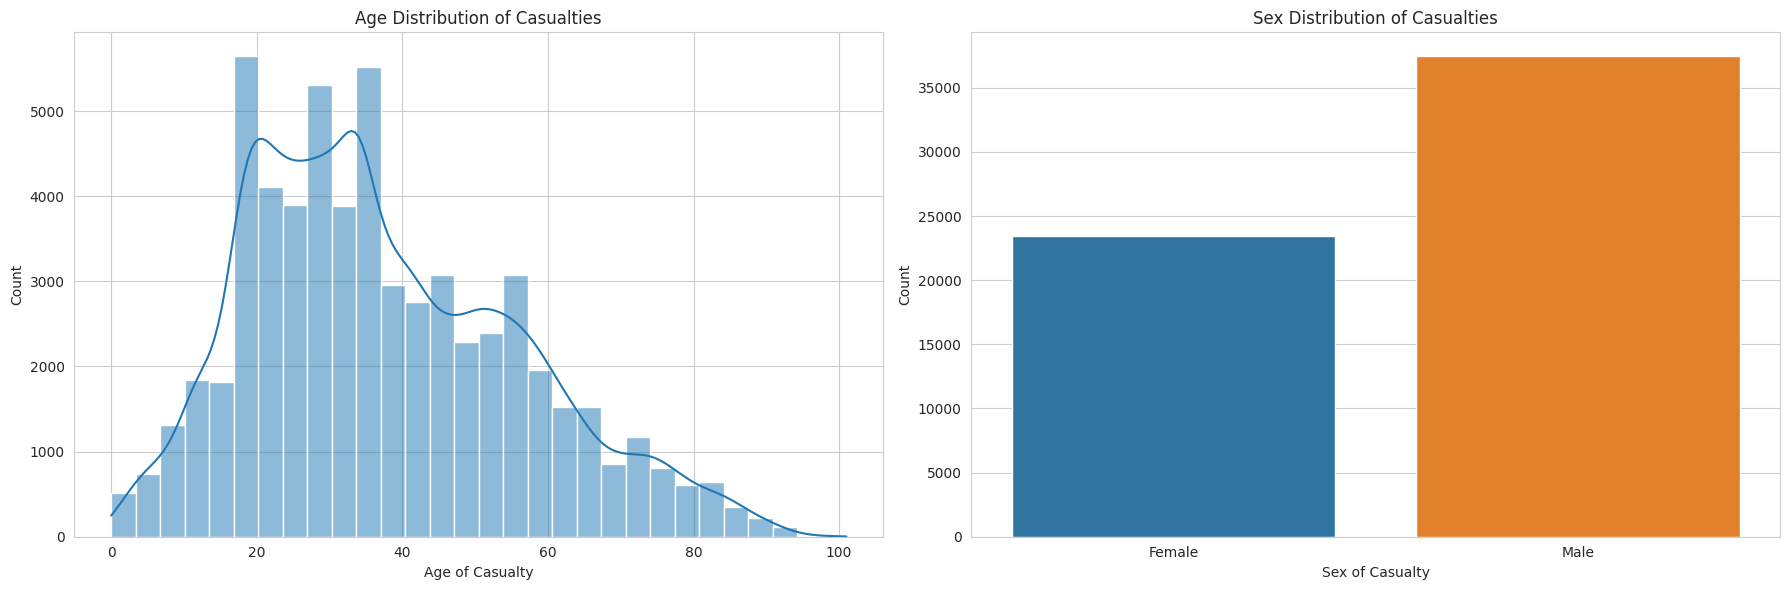

In [78]:
sns.set_style("whitegrid")


# Create a figure and a set of subplots for age and sex distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for Age Distribution of Casualties
sns.histplot(df['age_of_casualty'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution of Casualties')
axes[0].set_xlabel('Age of Casualty')
axes[0].set_ylabel('Count')

# Plot for Sex Distribution of Casualties
sns.countplot(x='sex_of_casualty', data=df, ax=axes[1])
axes[1].set_title('Sex Distribution of Casualties')
axes[1].set_xlabel('Sex of Casualty')
axes[1].set_ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()

## Geographic Analysis

In [79]:
! pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [80]:
import folium
from folium.plugins import HeatMap

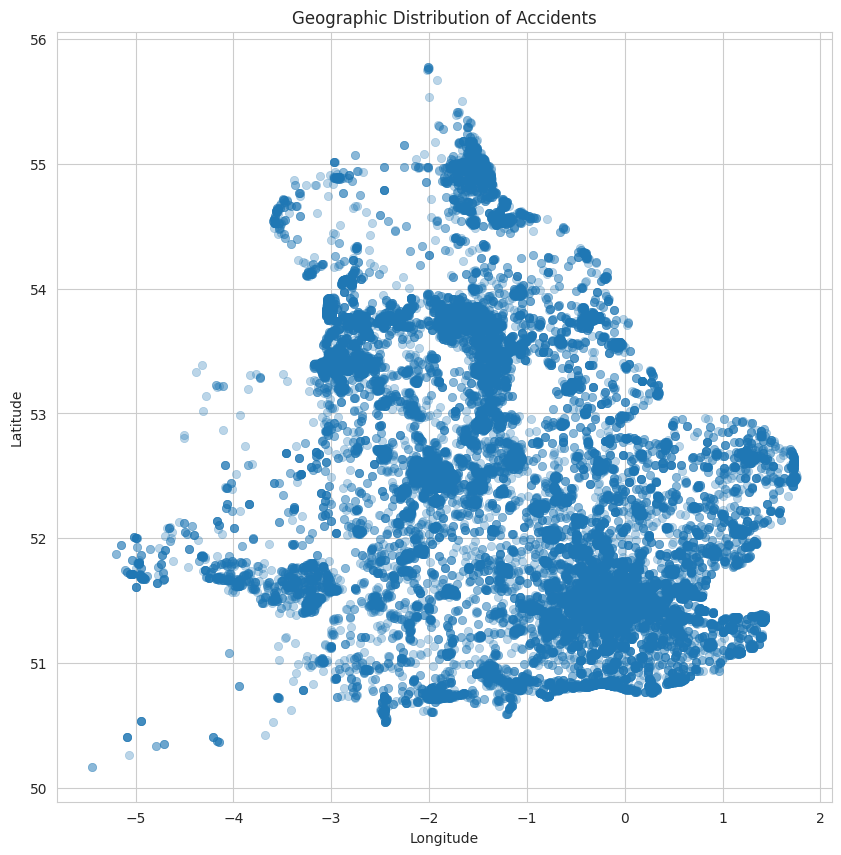

In [81]:
# Check if there are enough data points with valid Longitude and Latitude for a meaningful geographic analysis
valid_geo_data = clean_df.dropna(subset=['Longitude', 'Latitude'])

# Determine if the dataset is sufficient for geographic analysis
if len(valid_geo_data) > 0:
    # Plotting the geographical distribution of accidents
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x='Longitude', y='Latitude', data=valid_geo_data, alpha=0.3, edgecolor=None)
    plt.title('Geographic Distribution of Accidents')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()
else:
    print("Insufficient data for geographic analysis.")

In [82]:
mean_long = valid_geo_data['Longitude'].mean()
mean_lat = valid_geo_data['Latitude'].mean()

# Create a map centered around the mean longitude and latitude
map = folium.Map(location=[mean_lat, mean_long], zoom_start=6)

# Add a heat map layer to the map to visualize the density of accidents
HeatMap(valid_geo_data[['Latitude', 'Longitude']], radius=10).add_to(map)

map.save('accidents.html')

## Casualty Severity Analysis

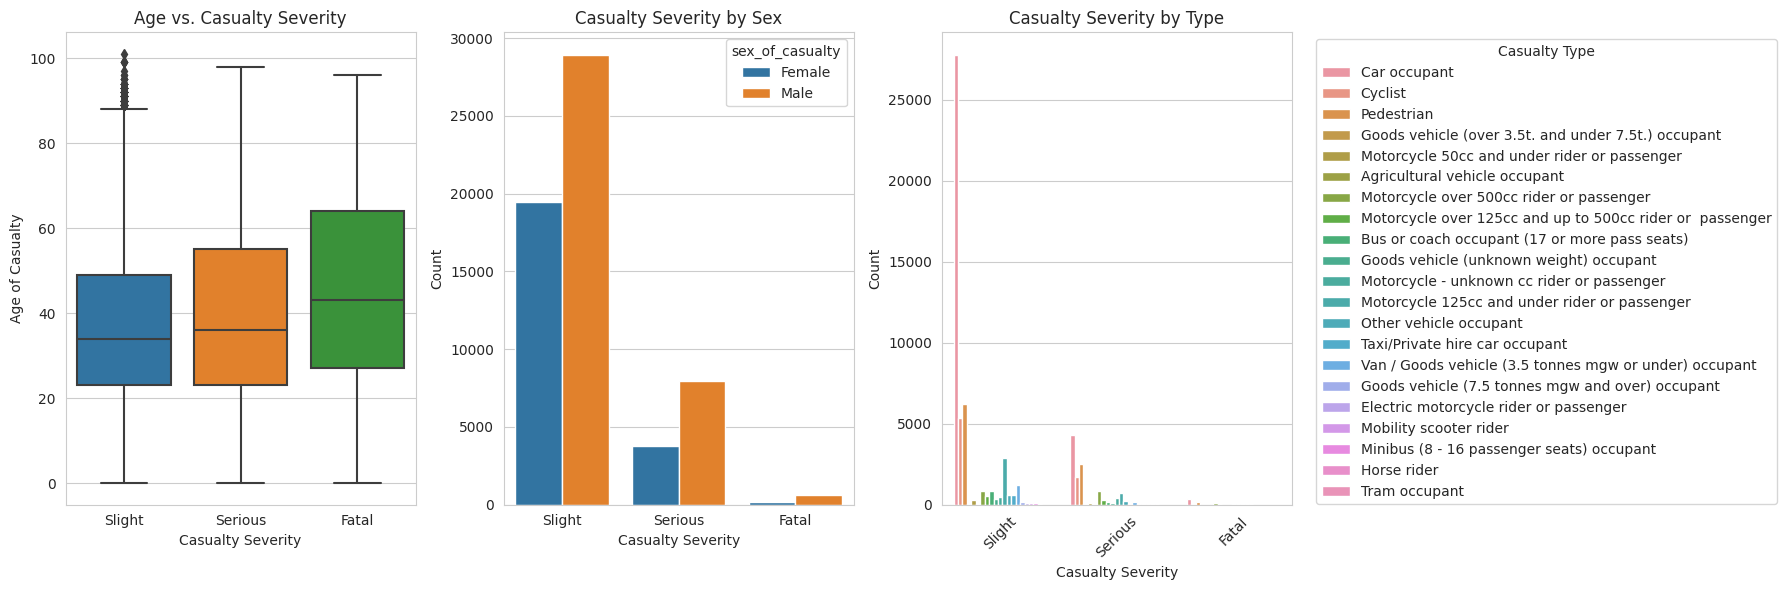

In [83]:
# Encoding 'casualty_severity' as an ordinal variable for analysis
severity_mapping = {'Slight': 1, 'Serious': 2, 'Fatal': 3}
clean_df['casualty_severity_encoded'] = clean_df['casualty_severity'].map(severity_mapping)

# Create a figure for visualizing the relationships
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Relationship between casualty severity and age
sns.boxplot(x='casualty_severity', y='age_of_casualty', data=clean_df, order=['Slight', 'Serious', 'Fatal'], ax=axes[0])
axes[0].set_title('Age vs. Casualty Severity')
axes[0].set_xlabel('Casualty Severity')
axes[0].set_ylabel('Age of Casualty')

# Distribution of severity by sex
sns.countplot(x='casualty_severity', hue='sex_of_casualty', data=clean_df, order=['Slight', 'Serious', 'Fatal'], ax=axes[1])
axes[1].set_title('Casualty Severity by Sex')
axes[1].set_xlabel('Casualty Severity')
axes[1].set_ylabel('Count')

# Distribution of severity by casualty type
plt.xticks(rotation=45)
sns.countplot(x='casualty_severity', hue='casualty_type', data=clean_df, order=['Slight', 'Serious', 'Fatal'], ax=axes[2])
axes[2].set_title('Casualty Severity by Type')
axes[2].set_xlabel('Casualty Severity')
axes[2].set_ylabel('Count')
axes[2].legend(title='Casualty Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Casualty Class Distribution

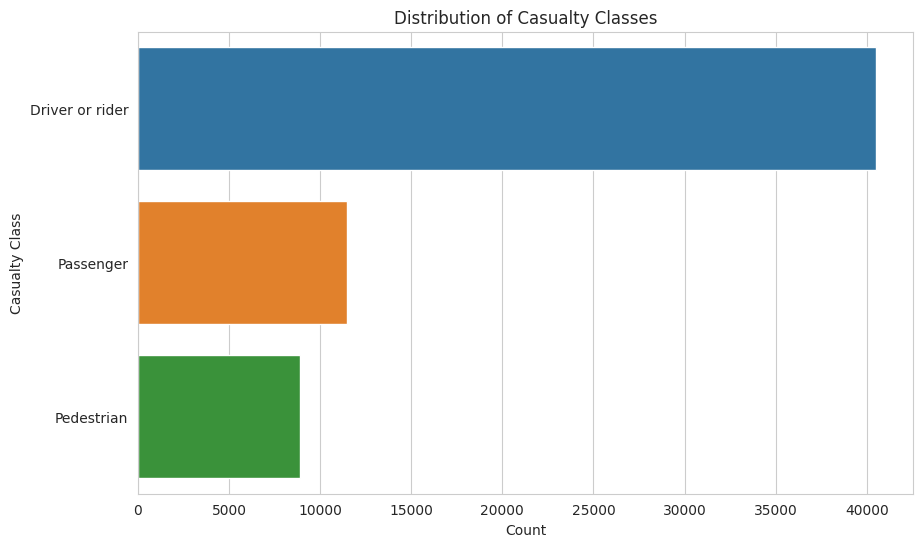

In [84]:
# Create a figure for the distribution of casualty classes
plt.figure(figsize=(10, 6))
sns.countplot(y='casualty_class', data=clean_df, order=clean_df['casualty_class'].value_counts().index)
plt.title('Distribution of Casualty Classes')
plt.xlabel('Count')
plt.ylabel('Casualty Class')

# Show the plot
plt.show()

## Casualty Type Distribution

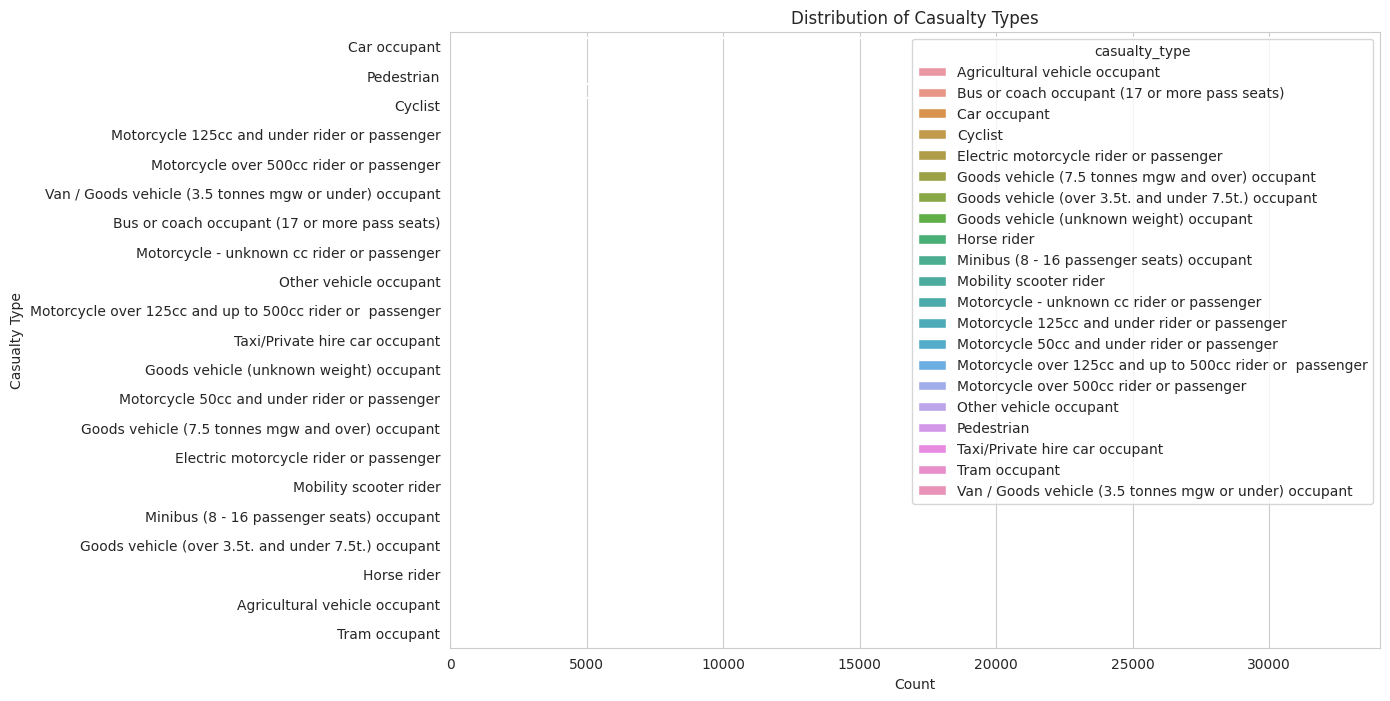

In [85]:
# Create a figure for the distribution of casualty types
plt.figure(figsize=(12, 8))
sns.countplot(y='casualty_type', data=df, order=clean_df['casualty_type'].value_counts().index, hue='casualty_type')
plt.title('Distribution of Casualty Types')
plt.xlabel('Count')
plt.ylabel('Casualty Type')

# Show the plot
plt.show()

## Casualty Home Area Type & Casualties by IMD Decile

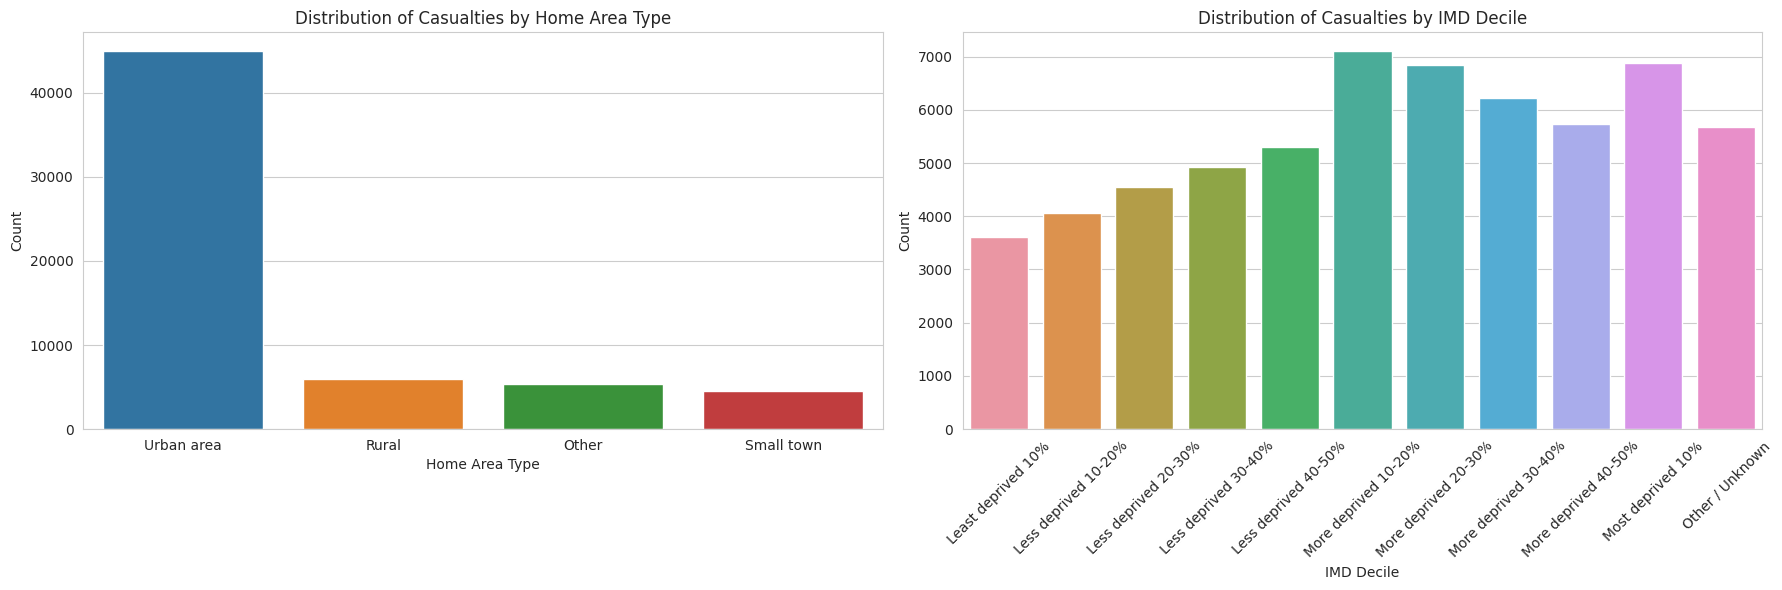

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Distribution by Casualty Home Area Type
sns.countplot(x='casualty_home_area_type', data=clean_df, ax=axes[0], order=clean_df['casualty_home_area_type'].value_counts().index)
axes[0].set_title('Distribution of Casualties by Home Area Type')
axes[0].set_xlabel('Home Area Type')
axes[0].set_ylabel('Count')

# Distribution by Casualty IMD Decile
sns.countplot(x='casualty_imd_decile', data=clean_df, ax=axes[1], order=sorted(clean_df['casualty_imd_decile'].unique()))
axes[1].set_title('Distribution of Casualties by IMD Decile')
axes[1].set_xlabel('IMD Decile')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Pedestrian Analysis (Movement & Location)

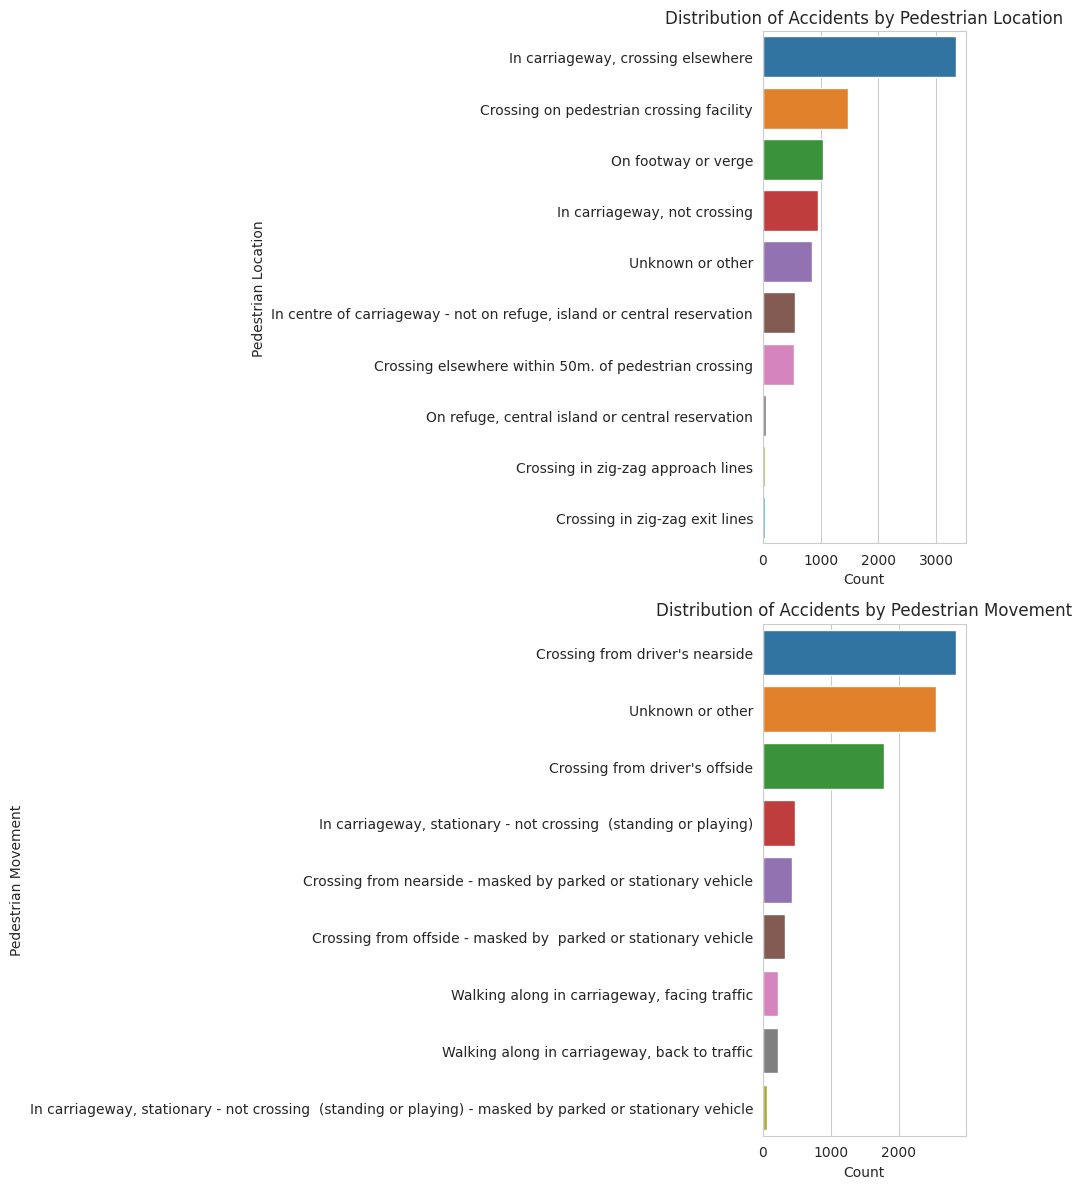

In [87]:
pedestrian_data = clean_df[clean_df['pedestrian_location'] != 'Not a Pedestrian']

# Create the plots focusing only on pedestrian data
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Distribution by Pedestrian Location
sns.countplot(y='pedestrian_location', data=pedestrian_data, ax=axes[0], order=pedestrian_data['pedestrian_location'].value_counts().index)
axes[0].set_title('Distribution of Accidents by Pedestrian Location')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Pedestrian Location')

# Distribution by Pedestrian Movement
sns.countplot(y='pedestrian_movement', data=pedestrian_data, ax=axes[1], order=pedestrian_data['pedestrian_movement'].value_counts().index)
axes[1].set_title('Distribution of Accidents by Pedestrian Movement')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Pedestrian Movement')

plt.tight_layout()
plt.show()

## Casualties by Severity Over Different Areas

<function matplotlib.pyplot.show(close=None, block=None)>

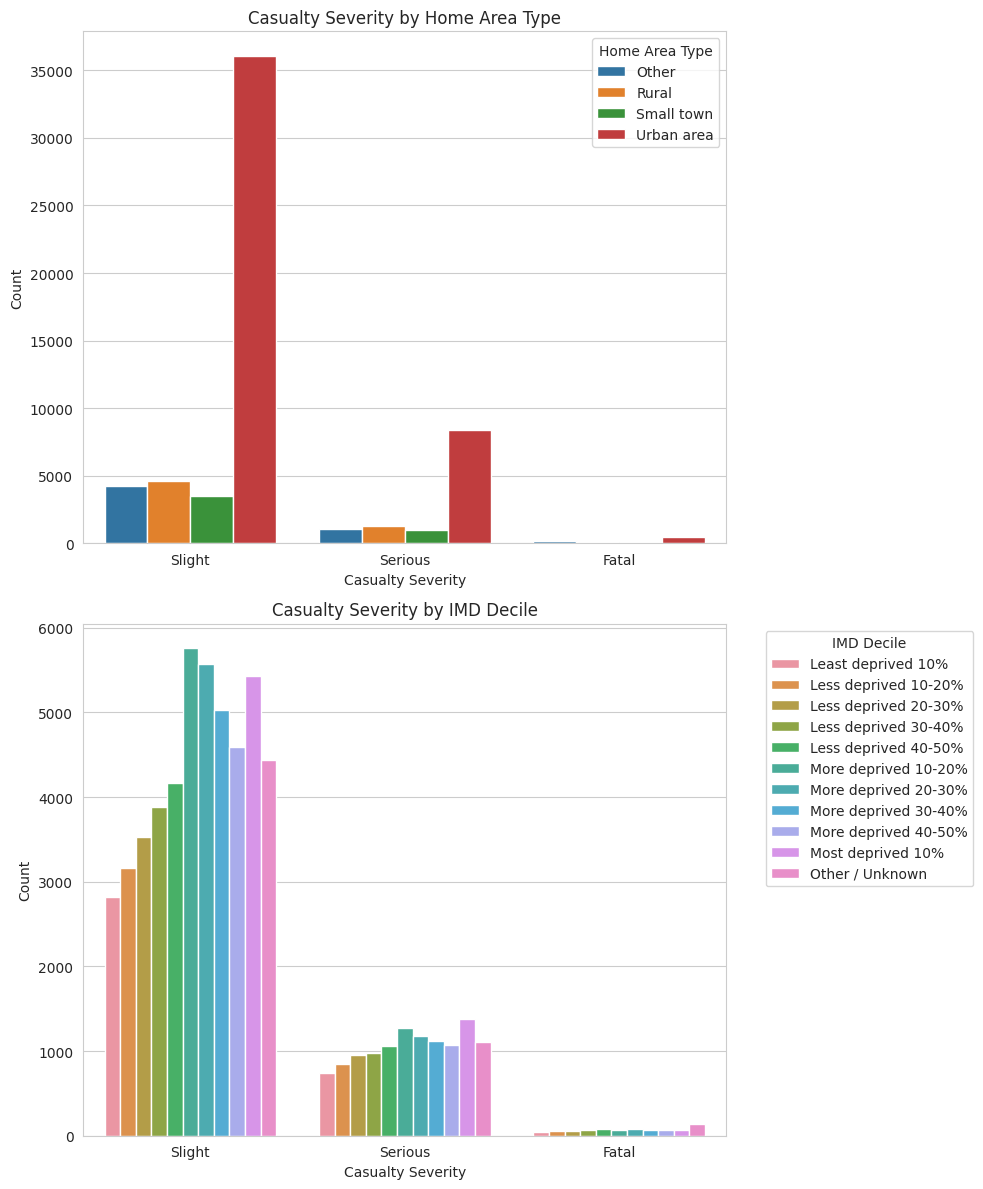

In [88]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Distribution of Casualty Severity by Home Area Type
sns.countplot(x='casualty_severity', hue='casualty_home_area_type', data=df, ax=axes[0], order=['Slight', 'Serious', 'Fatal'])
axes[0].set_title('Casualty Severity by Home Area Type')
axes[0].set_xlabel('Casualty Severity')
axes[0].set_ylabel('Count')
axes[0].legend(title='Home Area Type')

# Distribution of Casualty Severity by IMD Decile
sns.countplot(x='casualty_severity', hue='casualty_imd_decile', data=df, ax=axes[1], order=['Slight', 'Serious', 'Fatal'])
axes[1].set_title('Casualty Severity by IMD Decile')
axes[1].set_xlabel('Casualty Severity')
axes[1].set_ylabel('Count')
axes[1].legend(title='IMD Decile', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show

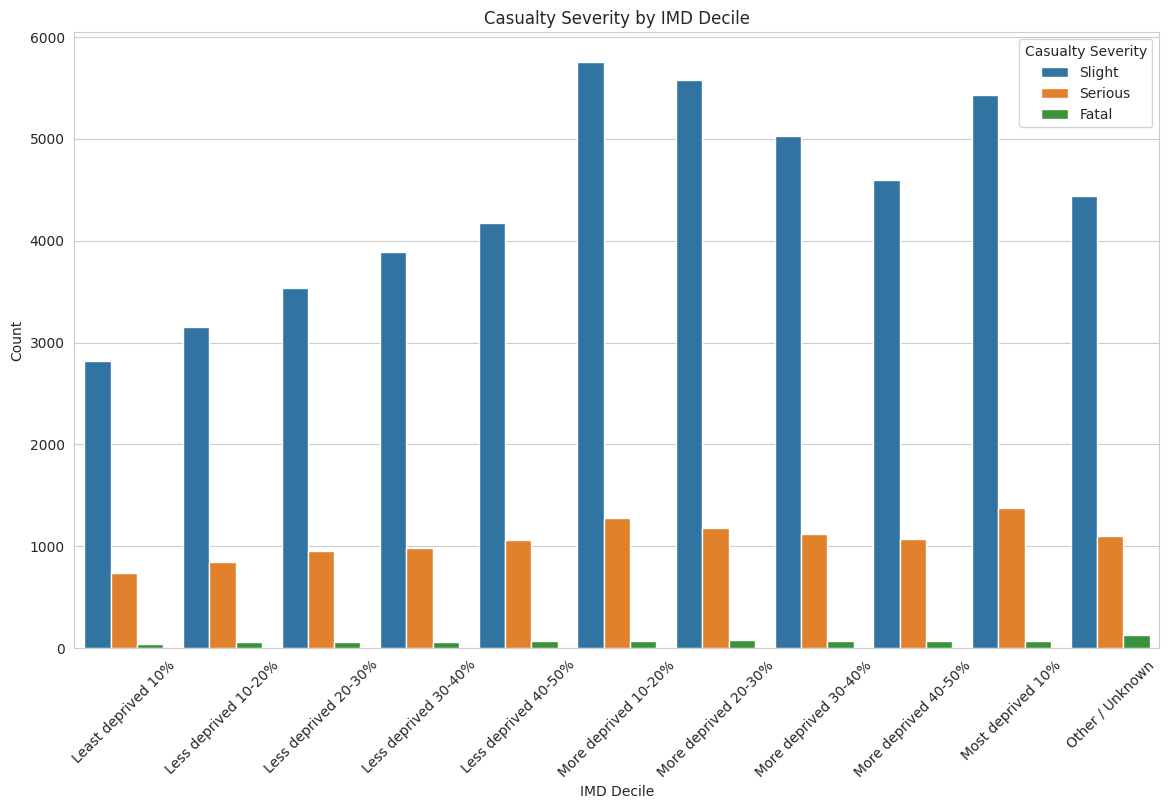

In [89]:
# Create the plot
plt.figure(figsize=(14, 8))
sns.countplot(x='casualty_imd_decile', hue='casualty_severity', data=df, hue_order=['Slight', 'Serious', 'Fatal'])
plt.title('Casualty Severity by IMD Decile')
plt.xlabel('IMD Decile')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Casualty Severity')

# Show the plot
plt.show()

## Casualty Type and Home Area Type Correlation

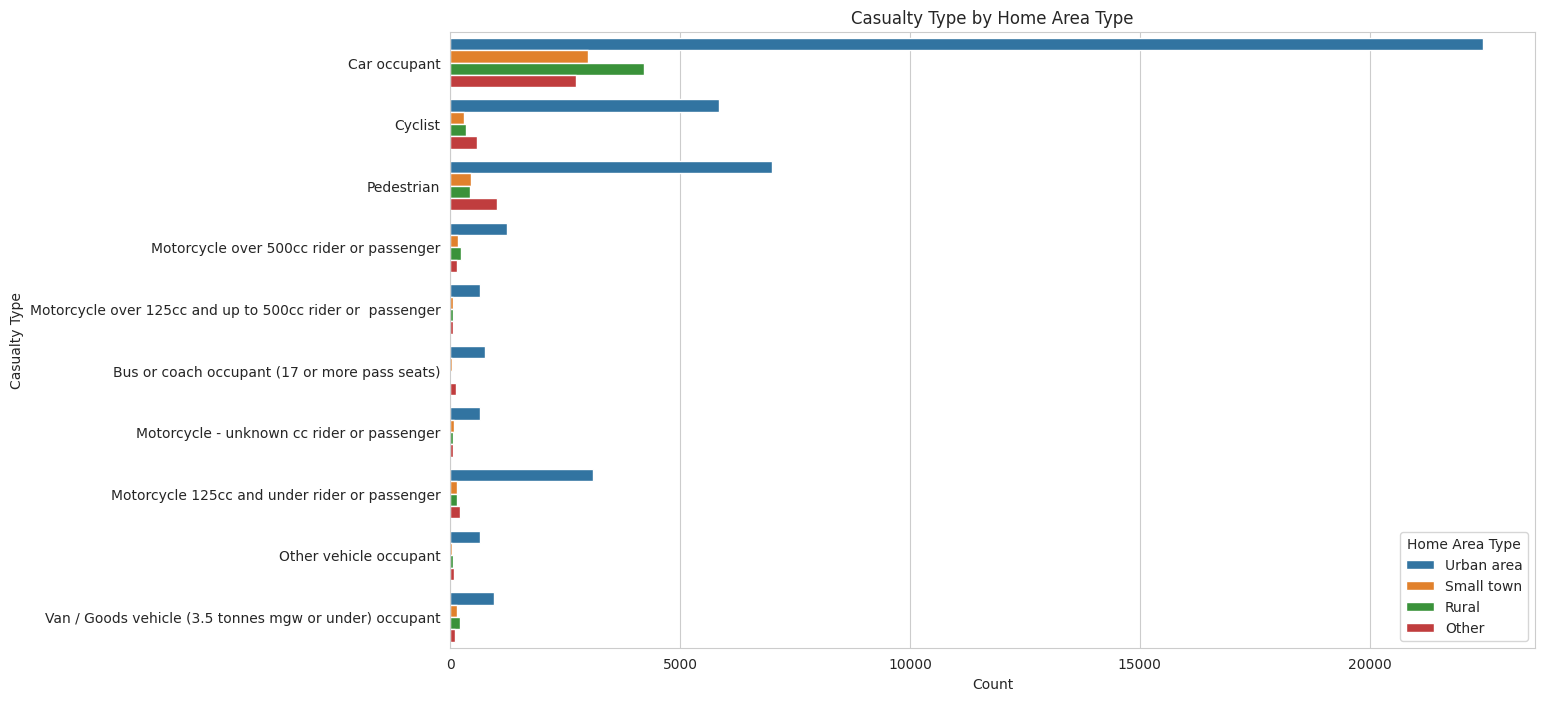

In [90]:

# Since the plot may involve many unique casualty types, we'll focus on the top casualty types for clarity
top_casualty_types = clean_df['casualty_type'].value_counts().nlargest(10).index

# Filter the dataset to include only the top casualty types
filtered_data = clean_df[clean_df['casualty_type'].isin(top_casualty_types)]

# Create the plot
plt.figure(figsize=(14, 8))
sns.countplot(y='casualty_type', hue='casualty_home_area_type', data=filtered_data)
plt.title('Casualty Type by Home Area Type')
plt.xlabel('Count')
plt.ylabel('Casualty Type')
plt.legend(title='Home Area Type')

# Show the plot
plt.show()

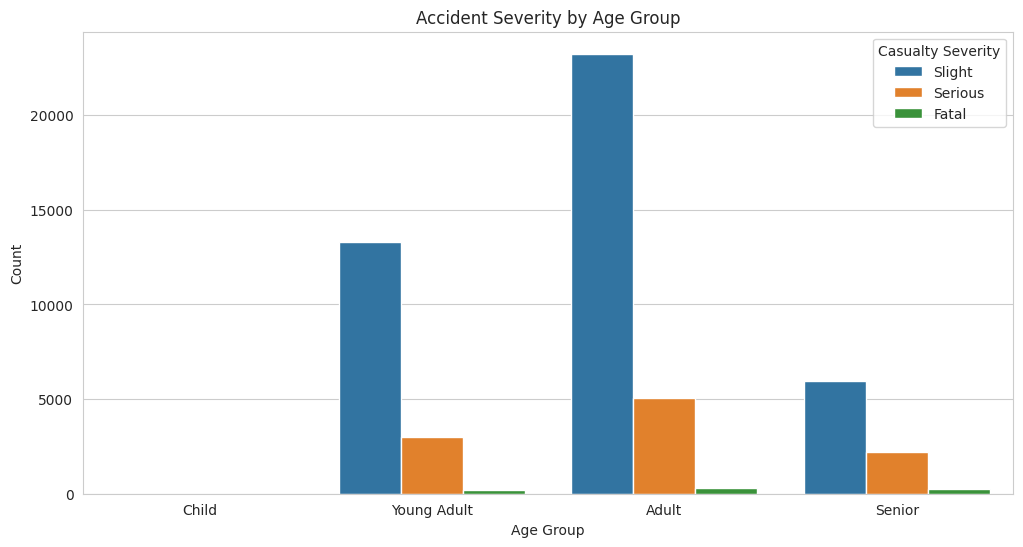

In [91]:
# Create the plot
plt.figure(figsize=(12, 6))
sns.countplot(x='age_group', hue='casualty_severity', data=df, order=['Child', 'Young Adult', 'Adult', 'Senior'], hue_order=['Slight', 'Serious', 'Fatal'])
plt.title('Accident Severity by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Casualty Severity')

# Show the plot
plt.show()

## Enhanced map visualization with multiple data categories

In [92]:
# Initialize the map
map = folium.Map(location=[mean_lat, mean_long], zoom_start=6)

# Prepare a color map for casualty types
casualty_types = df['casualty_type'].unique()
colors = sns.color_palette('hsv', len(casualty_types)).as_hex() # Using seaborn to generate colors
color_map = dict(zip(casualty_types, colors))

# Add markers for each casualty type
for casualty_type in casualty_types:
    for _, row in df[df['casualty_type'] == casualty_type].iterrows():
        if pd.notnull(row['Longitude']) and pd.notnull(row['Latitude']):
            folium.CircleMarker(
                location=[row['Latitude'], row['Longitude']],
                radius=3,
                color=color_map[casualty_type],
                fill=True,
                fill_color=color_map[casualty_type],
                popup=casualty_type
            ).add_to(map)

# Manually build a legend (HTML string based on the color map)
legend_html = '<div style="position: fixed; bottom: 50px; left: 50px; width: 150px; height: {}px; border:2px solid grey; z-index:9999; font-size:14px; ">&nbsp; Legend <br>'.format(len(casualty_types) * 25)
for casualty_type, color in color_map.items():
    legend_html += '&nbsp; <i class="fa fa-circle" style="color:{}"></i> {} &nbsp; <br>'.format(color, casualty_type)
legend_html += '</div>'

map.get_root().html.add_child(folium.Element(legend_html))

# Save the map
map_file_path = 'complete_casualty_map.html'
map.save(map_file_path)



# Machine Learning

In [93]:
clean_df.head()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,...,casualty_imd_decile,lsoa_of_casualty,age_group,casualties_count,accidents_count,LSOA name,Location,Longitude,Latitude,casualty_severity_encoded
0,2022070151244,2022,070151244,2,1,Driver or rider,Female,46.0,46 - 55,Slight,...,Less deprived 10-20%,E01033378,Adult,1,2,Cheshire East 053E,On or near Newcastle Road,-2.488437,53.061740,1
1,2022070152668,2022,070152668,1,1,Driver or rider,Male,30.0,26 - 35,Slight,...,More deprived 10-20%,E01018551,Adult,1,5,Cheshire West and Chester 011C,On or near Flint Court,-2.889868,53.267739,1
2,2022070154696,2022,070154696,1,1,Driver or rider,Female,58.0,56 - 65,Slight,...,Least deprived 10%,E01006134,Adult,6,1,Unknown,Unknown,NaN,NaN,1
3,2022070154696,2022,070154696,2,3,Driver or rider,Female,78.0,Over 75,Slight,...,Least deprived 10%,E01018724,Senior,6,3,Cheshire West and Chester 045C,On or near Oathills Close,-2.664853,53.156260,1
4,2022070154696,2022,070154696,3,2,Driver or rider,Male,63.0,56 - 65,Slight,...,Less deprived 30-40%,W01000578,Senior,6,2,Pembrokeshire 014B,On or near Foss Way,-4.887997,51.697906,1


In [94]:
clean_df.isna().sum()

accident_index                            0
accident_year                             0
accident_reference                        0
vehicle_reference                         0
casualty_reference                        0
casualty_class                            0
sex_of_casualty                           0
age_of_casualty                           0
age_band_of_casualty                      0
casualty_severity                         0
pedestrian_location                       0
pedestrian_movement                       0
car_passenger                             0
bus_or_coach_passenger                    0
pedestrian_road_maintenance_worker        0
casualty_type                             0
casualty_home_area_type                   0
casualty_imd_decile                       0
lsoa_of_casualty                          0
age_group                                 0
casualties_count                          0
accidents_count                           0
LSOA name                       

In [95]:
cleaner_df = clean_df.dropna()
cleaner_df.isna().sum()

accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
lsoa_of_casualty                      0
age_group                             0
casualties_count                      0
accidents_count                       0
LSOA name                             0
Location                              0
Longitude                             0


## Predictive Modeling

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

### Accident Severity Prediction

#### Data Prepration

In [97]:
# Assuming a column named 'severity' exists for the target variable. If it's named differently, this needs to be updated.
target = 'casualty_severity'

# Select a subset of features that could be relevant for predicting accident severity
feature_columns = ['age_of_casualty', 'sex_of_casualty', 'casualty_class', 'Longitude', 'Latitude']
X = df[feature_columns]
y = df[target]  #

# Preprocessing for numerical features
numerical_features = ['age_of_casualty', 'Longitude', 'Latitude']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical features
categorical_features = ['sex_of_casualty', 'casualty_class']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Random Forest Classifier

#### Train, Test, Validate

In [98]:
# Creating a new model pipeline with preprocessing and RandomForestClassifier
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', RandomForestClassifier(random_state=42))])

# Training the model pipeline with the correct target
model_pipeline.fit(X_train, y_train)

# Predicting on the test set with the trained model
y_pred = model_pipeline.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)
print(classification_rep)

0.7757615567780606
              precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00       150
     Serious       0.27      0.07      0.11      2337
      Slight       0.80      0.96      0.87      9692

    accuracy                           0.78     12179
   macro avg       0.36      0.34      0.33     12179
weighted avg       0.69      0.78      0.72     12179



#### XGBoost Classifier

In [99]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [100]:
from xgboost import XGBClassifier

In [101]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable to encode labels into integers
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Update the pipeline fitting and prediction steps to use the encoded target variable
xgb_pipeline.fit(X_train, y_train_encoded)
y_pred_xgb_encoded = xgb_pipeline.predict(X_test)

# Optionally, if you need to interpret the model predictions, you can transform the predictions back to the original labels
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

# Calculate accuracy and classification report with the original labels for readability
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

print(accuracy_xgb)
print(classification_rep_xgb)

0.7941538714180146
              precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00       150
     Serious       0.40      0.02      0.04      2337
      Slight       0.80      0.99      0.89      9692

    accuracy                           0.79     12179
   macro avg       0.40      0.34      0.31     12179
weighted avg       0.71      0.79      0.71     12179



In [102]:
from sklearn.model_selection import GridSearchCV


In [103]:
# Define a parameter grid to search over
param_grid = {
    'model__max_depth': [3, 6, 9, 1],
    'model__learning_rate': [0.01, 0.1, 0.3, 0.001],
    'model__n_estimators': [100, 200, 300, 700]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train_encoded)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

### Clustering for Accident Hotspots Identification

In [104]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score

#### Data Preparation

In [105]:
X_geo = df[['Longitude', 'Latitude']].dropna()
X_geo_km = X_geo[['Longitude', 'Latitude']]

#### Feature Selection

#### Choosing a Clustering Algorithm

##### K-Means Clustering

###### Model Training and Cluster Identification

In [106]:
inertia = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_geo_km)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_geo_km, kmeans.labels_))

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_geo_km)

In [110]:
X_geo_km.head()

,Longitude,Latitude,KMeans_Cluster,DBSCAN_Cluster
0,-2.488437,53.061740,3,-1
1,-2.889868,53.267739,3,0
3,-2.664853,53.156260,3,-1
4,-4.887997,51.697906,2,-1
5,-2.746471,53.385741,3,-1


###### Analysis and Interpretation

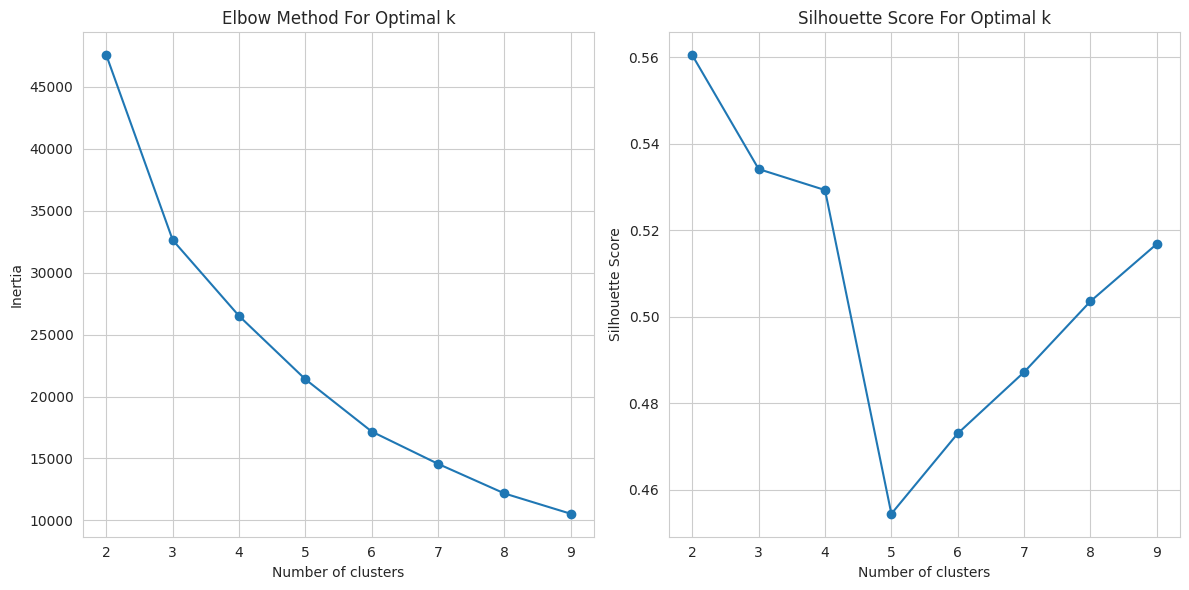

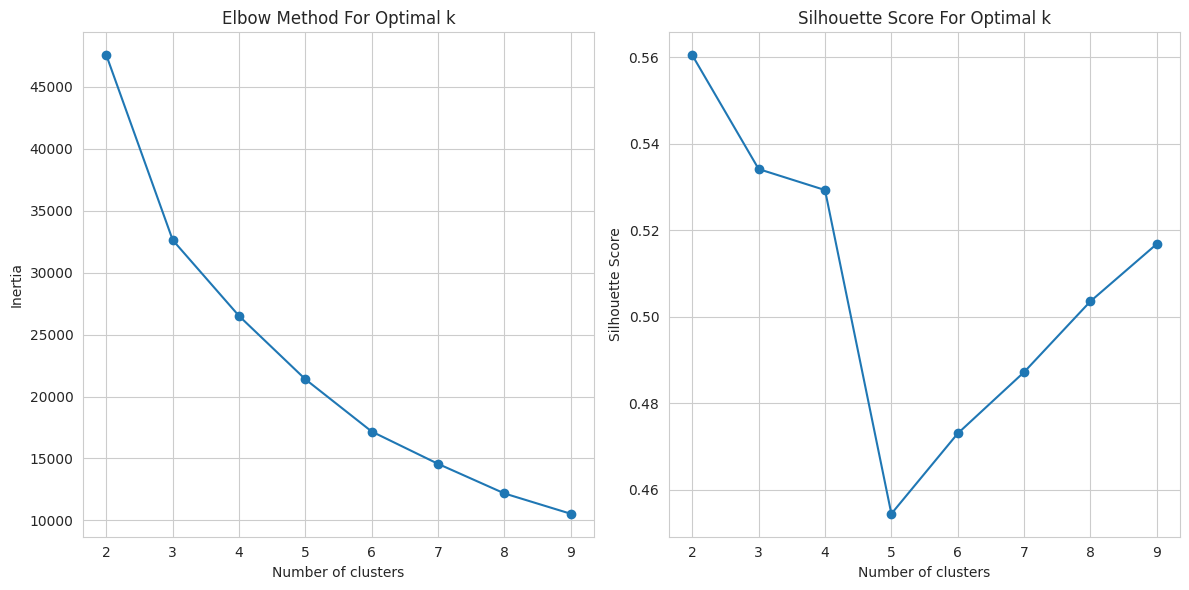

In [111]:
# Plotting the Elbow Method results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')

plt.tight_layout()
plt.show()# Plotting the Elbow Method results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')

plt.tight_layout()
plt.show()

In [115]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_geo)

##### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

###### Model Training and Cluster Identification

In [112]:
dbscan = DBSCAN(eps=0.01, min_samples=10)
dbscan_clusters = dbscan.fit_predict(X_geo_km)

###### Analysis and Interpretation

###### Visualization

In [118]:
# Prepare the data for visualization
X_geo['KMeans_Cluster'] = kmeans_clusters
X_geo['DBSCAN_Cluster'] = dbscan_clusters

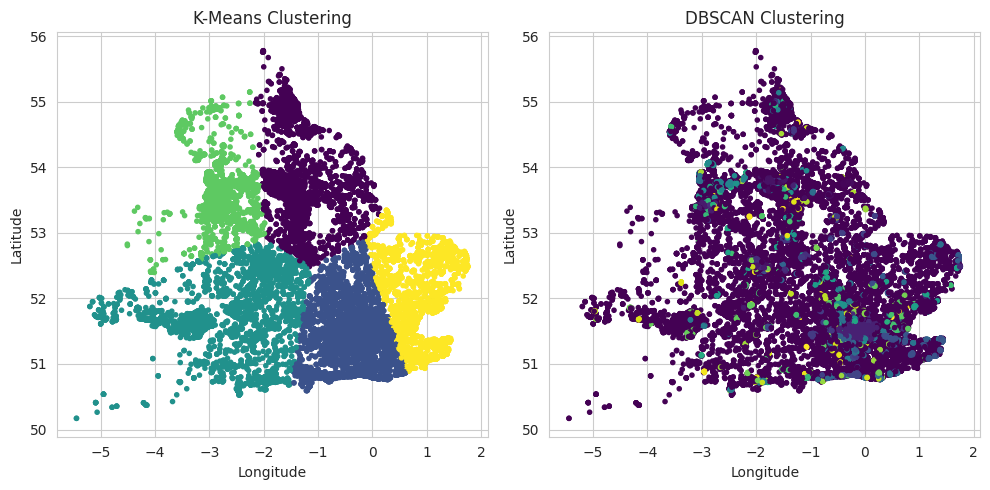

In [119]:
plt.figure(figsize=(10, 5))

# K-Means Clusters
plt.subplot(1, 2, 1)
plt.scatter(X_geo['Longitude'], X_geo['Latitude'], c=X_geo['KMeans_Cluster'], cmap='viridis', marker='.')
plt.title('K-Means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# DBSCAN Clusters
plt.subplot(1, 2, 2)
plt.scatter(X_geo['Longitude'], X_geo['Latitude'], c=X_geo['DBSCAN_Cluster'], cmap='viridis', marker='.')
plt.title('DBSCAN Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

In [121]:
import matplotlib

In [124]:
X_geo

,Longitude,Latitude,KMeans_Cluster,DBSCAN_Cluster
0,-2.488437,53.061740,3,-1
1,-2.889868,53.267739,3,0
3,-2.664853,53.156260,3,-1
4,-4.887997,51.697906,2,-1
5,-2.746471,53.385741,3,-1
...,...,...,...,...
60888,1.434145,51.355618,4,162
60889,1.101882,51.263427,4,-1
60891,0.568862,51.388541,4,139
60892,1.186905,51.091614,4,147


In [128]:
m = folium.Map(location=[X_geo['Latitude'].mean(), X_geo['Longitude'].mean()], zoom_start=10)

# Generate color palette
colors = plt.cm.rainbow(np.linspace(0, 1, kmeans.n_clusters))
colors = [matplotlib.colors.rgb2hex(color) for color in colors]

for _, row in X_geo.iterrows():
    # Convert cluster label to integer if necessary
    cluster_label = int(row['KMeans_Cluster'])
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=colors[cluster_label],
        fill=True,
        fill_color=colors[cluster_label],
        fill_opacity=0.7
    ).add_to(m)

# Optionally, add markers for cluster centers
for i, center in enumerate(kmeans.cluster_centers_):
    folium.Marker(location=[center[1], center[0]], # Note: Folium uses [lat, lon] order
                  icon=folium.Icon(icon='glyphicon-star', color='darkred'),
                  popup=f'Cluster {i} Center').add_to(m)
    
m.save('kmeans_clusters_map.html')


## Association Rule Mining